In [1]:
import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))

# import progressbar as pb

# from DeepRL.pong_atari.parallel_env import parallelEnv
# from DeepRL.pong_atari.agent import Agent
import numpy as np

from DeepRL import commons as cmn
from DeepRL.pong_atari import utils
from DeepRL.pong_atari.main import Reinforce

import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
import gym
import time

# PongDeterministic does not contain random frameskip
# so is faster to train than the vanilla Pong-v4 environment
env = gym.make('PongDeterministic-v4')

print("List of available actions: ", env.unwrapped.get_action_meanings())

List of available actions:  ['NOOP', 'FIRE', 'RIGHT', 'LEFT', 'RIGHTFIRE', 'LEFTFIRE']


## Preprocessing:
------

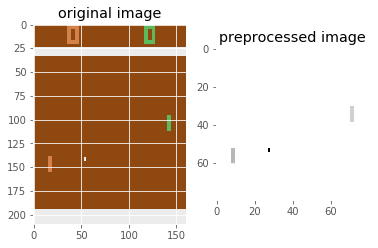

In [3]:
import matplotlib
import matplotlib.pyplot as plt

# show what a preprocessed image looks like
env.reset()
_, _, _, _ = env.step(0)
# get a frame after 20 steps
for _ in range(20):
    frame, _, _, _ = env.step(1)

plt.subplot(1,2,1)
plt.imshow(frame)
plt.title('original image')

plt.subplot(1,2,2)
plt.title('preprocessed image')

# 80 x 80 black and white image
plt.imshow(utils.preprocess_single(frame), cmap='Greys')
plt.show()


## Model 1:
-----------

* Using Network 1 : 2conv 2FC

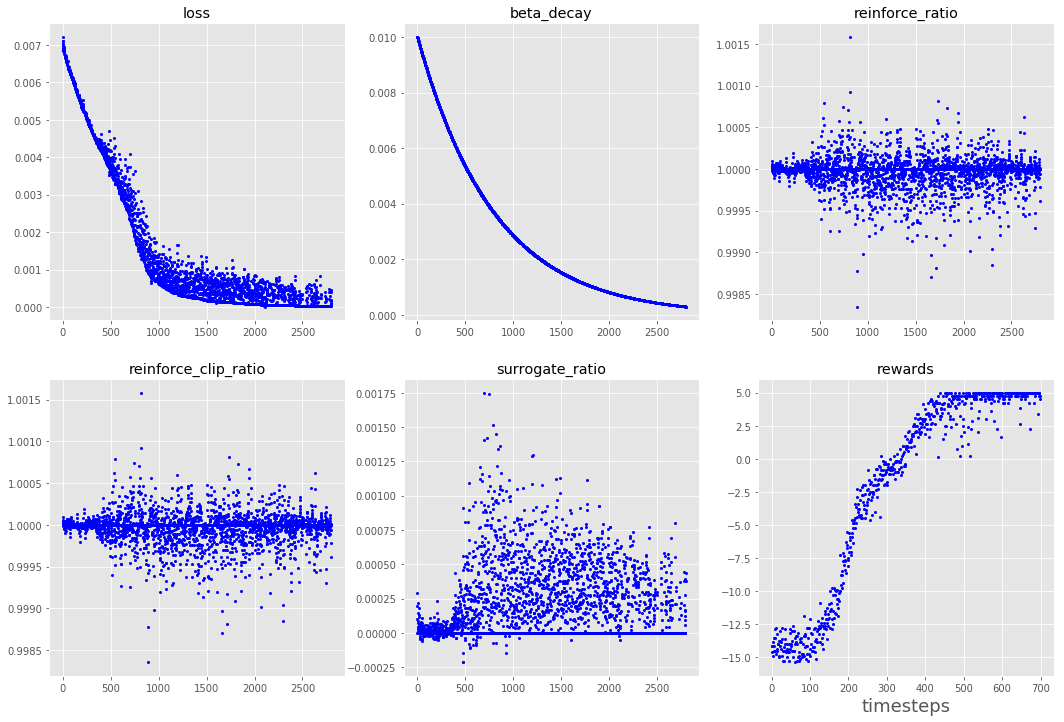

In [4]:
class Config:
    LEARNING_RATE = 0.0001
    DISCOUNT = 0.99
    BETA = 0.01
    BETA_DECAY = 0.995

    # To perform Proximal policy Optimization
    CLIP_SURROGATE = True
    EPSILON_CLIP = 0.1
    EPSILON_CLIP_DECAY = 0.999
    TRAJECTORY_INNER_LOOP_CNT = 4
    
    # Setup
    NET_NAME = 'net1'
    NUM_EPISODES = 700
    HORIZON = 320                # Number of state-action samples in a trajectory
    NUM_PARALLEL_ENV = 8         # Number of environments for parallel trajectory sampling
    SAVE_AFTER_EPISODES = 100     # Number of episodes after which stats and checkpoints are collected

    # USE PATH
    
    MODEL_NAME = 'model_1'
    CHECKPOINT_PATH = '/Users/sam/All-Program/App-DataSet/DeepRL/play_pong/%s/checkpoints'%str(MODEL_NAME)
    STATS_JSON_PATH = '/Users/sam/All-Program/App-DataSet/DeepRL/play_pong/%s/checkpoints/stats.json'%str(MODEL_NAME)
    
    if not os.path.exists(CHECKPOINT_PATH):
        os.makedirs(CHECKPOINT_PATH)


# avg_rewards = Reinforce(Config).train()
cmn.Plot()(Config.STATS_JSON_PATH, max_cols=3, exclude_plots=[]).show()   # 'beta_decay'

## Model 2
-----

CONV3 3FC

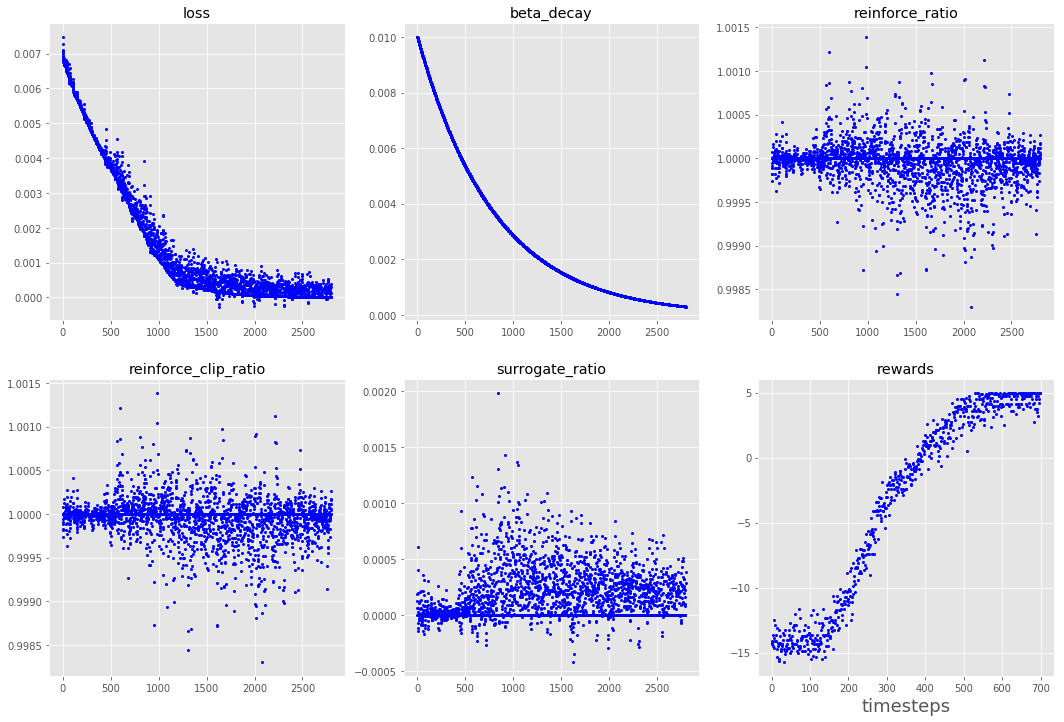

In [5]:
class Config:
    LEARNING_RATE = 0.0001
    DISCOUNT = 0.99
    BETA = 0.01
    BETA_DECAY = 0.995

    # To perform Proximal policy Optimization
    CLIP_SURROGATE = True
    EPSILON_CLIP = 0.1
    EPSILON_CLIP_DECAY = 0.999
    TRAJECTORY_INNER_LOOP_CNT = 4
    
    # Setup
    NET_NAME = 'net2'
    NUM_EPISODES = 700
    HORIZON = 320          # Number of state-action samples in a trajectory
    NUM_PARALLEL_ENV = 8   # Number of environments for parallel trajectory sampling
    SAVE_AFTER_EPISODES = 100     # Number of episodes after which stats and checkpoints are collected

    # USE PATH
    MODEL_NAME = 'model_2'
    CHECKPOINT_PATH = '/Users/sam/All-Program/App-DataSet/DeepRL/play_pong/%s/checkpoints'%str(MODEL_NAME)
    STATS_JSON_PATH = '/Users/sam/All-Program/App-DataSet/DeepRL/play_pong/%s/checkpoints/stats.json'%str(MODEL_NAME)
    
    if not os.path.exists(CHECKPOINT_PATH):
        os.makedirs(CHECKPOINT_PATH)


# avg_rewards = Reinforce(Config).train()
cmn.Plot()(Config.STATS_JSON_PATH, max_cols=3, exclude_plots=[]).show()   # 'beta_decay'

## Model 3:
----------------

The convergence is fast becasue we use **8** inner loop (performing gradient descent) for trajectories.

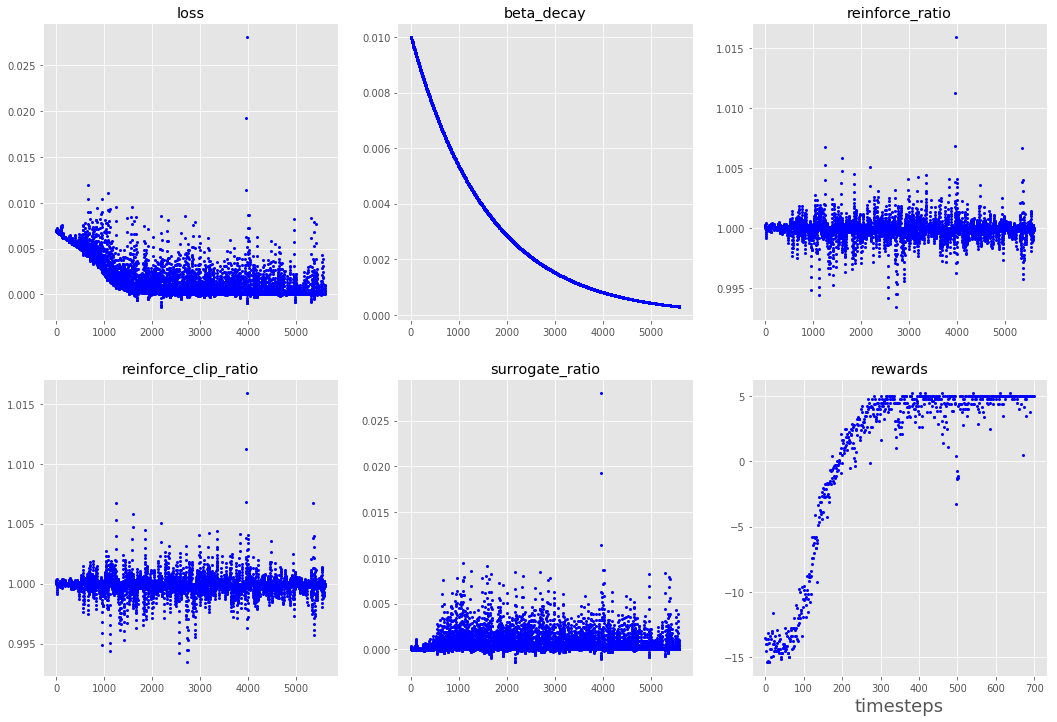

In [6]:
class Config:
    LEARNING_RATE = 0.0001
    DISCOUNT = 0.99
    BETA = 0.01
    BETA_DECAY = 0.995

    # To perform Proximal policy Optimization
    CLIP_SURROGATE = False
    EPSILON_CLIP = 0.1
    EPSILON_CLIP_DECAY = 0.999
    TRAJECTORY_INNER_LOOP_CNT = 8
    
    # Setup
    NET_NAME = 'net1'
    NUM_EPISODES = 700
    HORIZON = 320          # Number of state-action samples in a trajectory
    NUM_PARALLEL_ENV = 8   # Number of environments for parallel trajectory sampling
    SAVE_AFTER_EPISODES = 100     # Number of episodes after which stats and checkpoints are collected

    # USE PATH
    MODEL_NAME = 'model_3'
    CHECKPOINT_PATH = '/Users/sam/All-Program/App-DataSet/DeepRL/play_pong/%s/checkpoints'%str(MODEL_NAME)
    STATS_JSON_PATH = '/Users/sam/All-Program/App-DataSet/DeepRL/play_pong/%s/checkpoints/stats.json'%str(MODEL_NAME)
    
    if not os.path.exists(CHECKPOINT_PATH):
        os.makedirs(CHECKPOINT_PATH)


# avg_rewards = Reinforce(Config).train()
cmn.Plot()(Config.STATS_JSON_PATH, max_cols=3, exclude_plots=[]).show()   # 'beta_decay'

## Model 4:
-----------

Network 1 without Clip surrogate and with 4 Trajectory inner loop

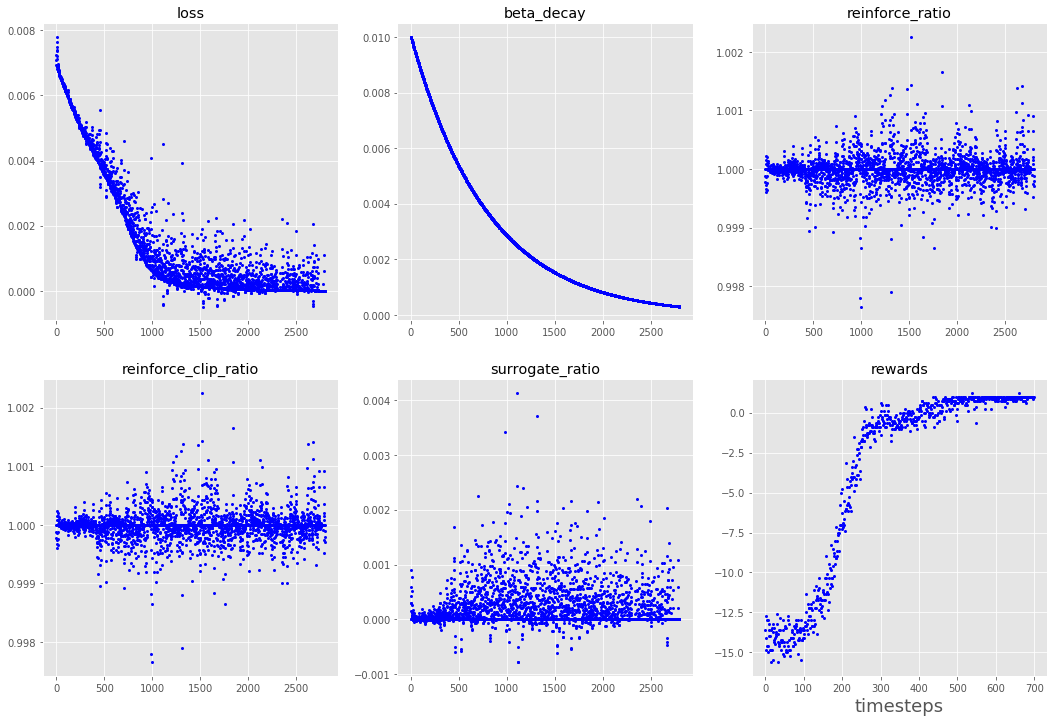

In [6]:
class Config:
    LEARNING_RATE = 0.0001
    DISCOUNT = 0.99
    BETA = 0.01
    BETA_DECAY = 0.995

    # To perform Proximal policy Optimization
    CLIP_SURROGATE = False
    EPSILON_CLIP = 0.1
    EPSILON_CLIP_DECAY = 0.999
    TRAJECTORY_INNER_LOOP_CNT = 4
    
    # Setup
    NET_NAME = 'net1'
    NUM_EPISODES = 700
    HORIZON = 320          # Number of state-action samples in a trajectory
    NUM_PARALLEL_ENV = 8   # Number of environments for parallel trajectory sampling
    SAVE_AFTER_EPISODES = 100     # Number of episodes after which stats and checkpoints are collected

    # USE PATH
    MODEL_NAME = 'model_4'
    CHECKPOINT_PATH = '/Users/sam/All-Program/App-DataSet/DeepRL/play_pong/%s/checkpoints'%str(MODEL_NAME)
    STATS_JSON_PATH = '/Users/sam/All-Program/App-DataSet/DeepRL/play_pong/%s/checkpoints/stats.json'%str(MODEL_NAME)
    
    if not os.path.exists(CHECKPOINT_PATH):
        os.makedirs(CHECKPOINT_PATH)


# avg_rewards = Reinforce(Config).train()
cmn.Plot()(Config.STATS_JSON_PATH, max_cols=3, exclude_plots=[]).show()   # 'beta_decay'

# Test with the Best Model:
------------

In [1]:
import os
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt

import sys
sys.path.append('/Users/sam/All-Program/App/deep-reinforcement-learning/')

from DeepRL import commons as cmn
from DeepRL.pong_atari.main import Reinforce

%matplotlib inline


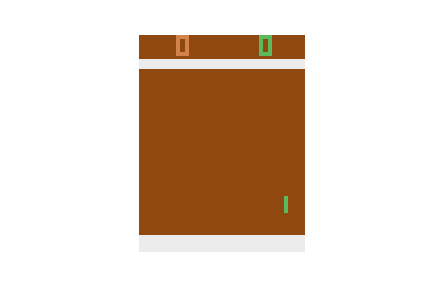
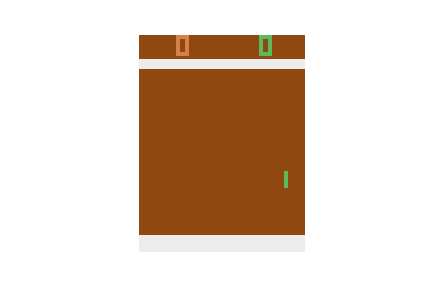
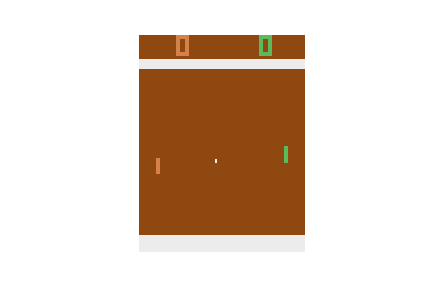
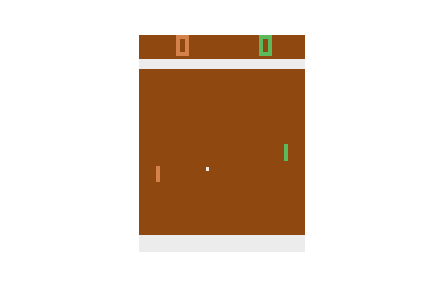
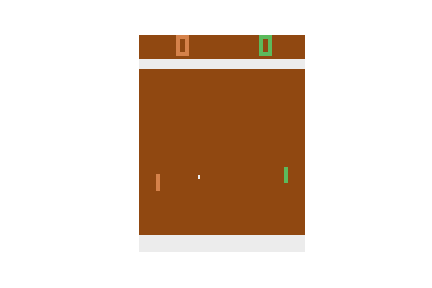
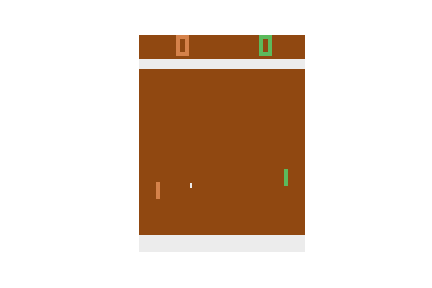
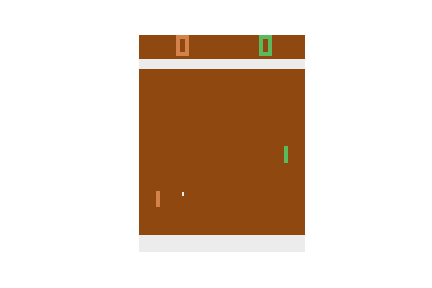
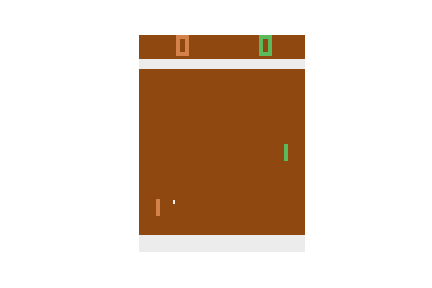
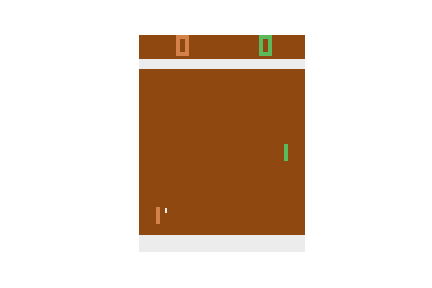
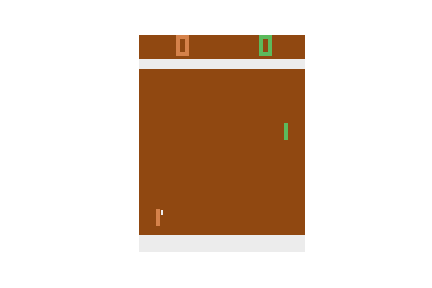
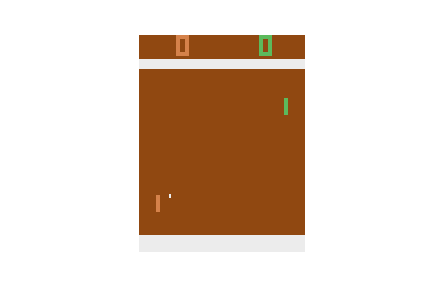
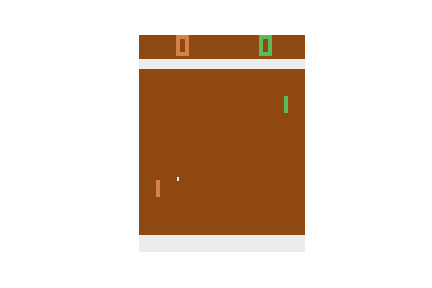
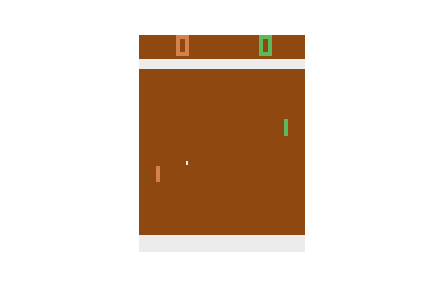
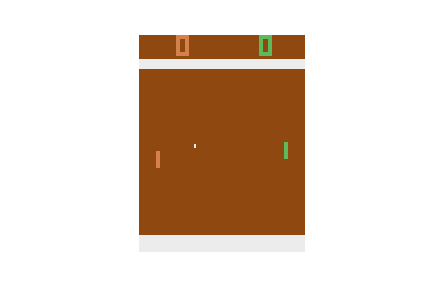
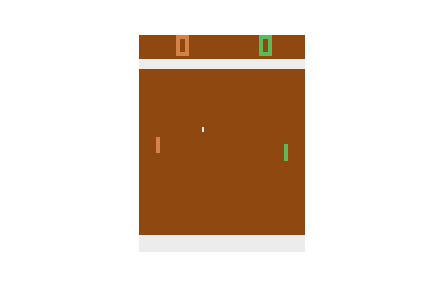
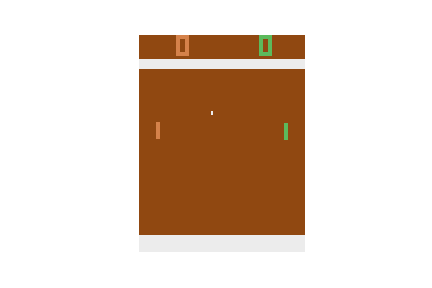
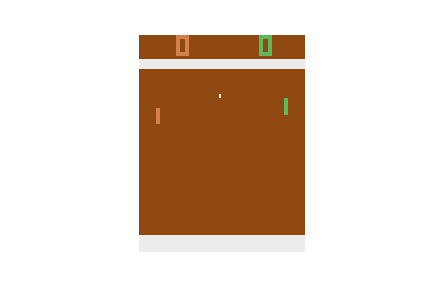
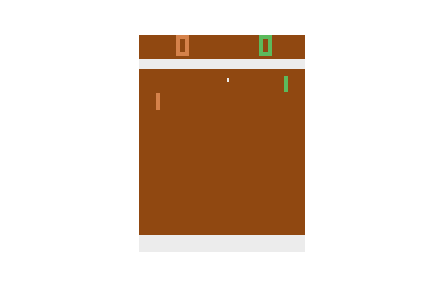
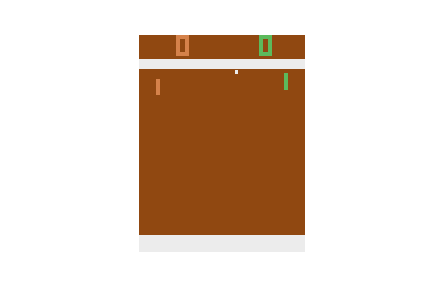
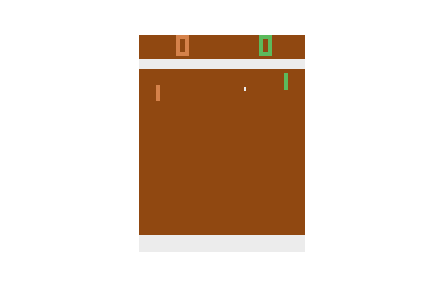
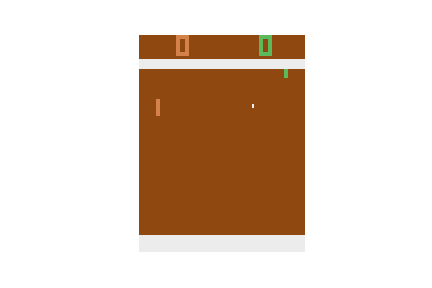
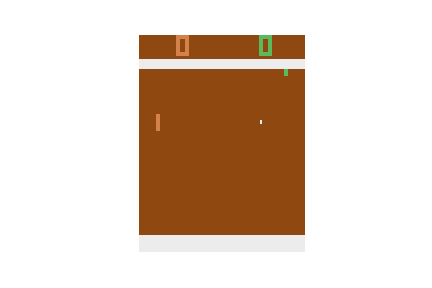
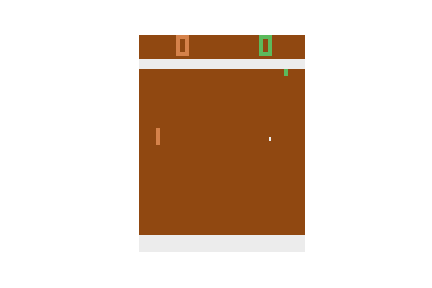
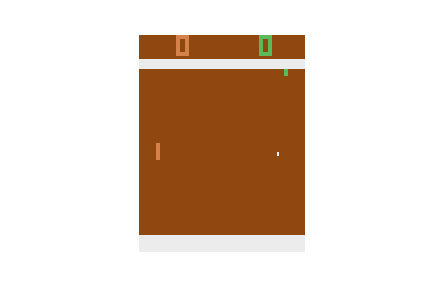
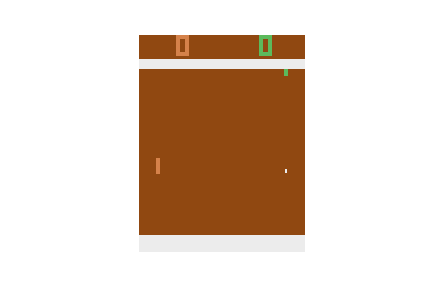
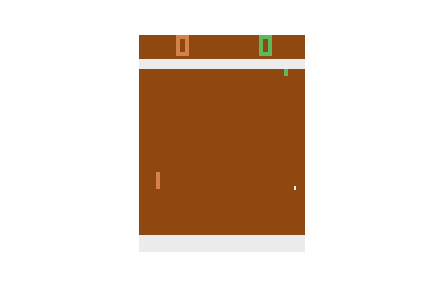
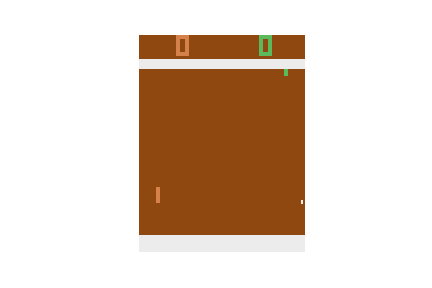
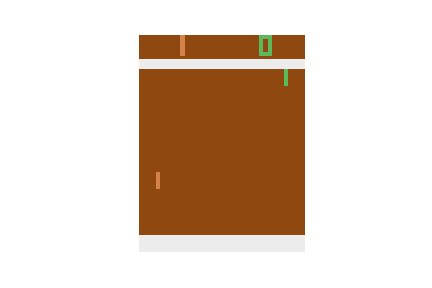
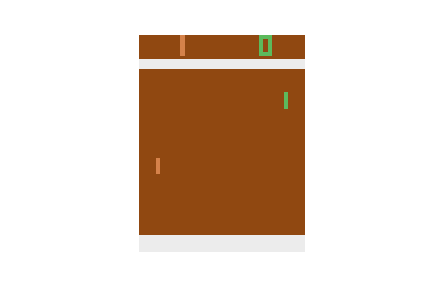
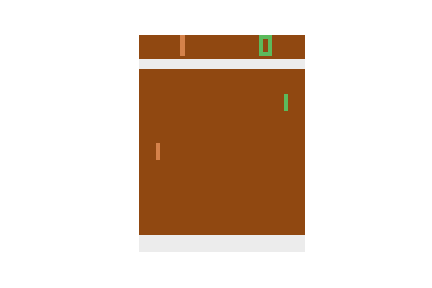
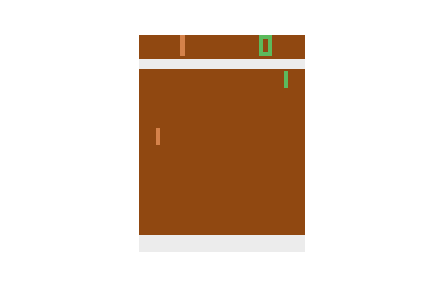
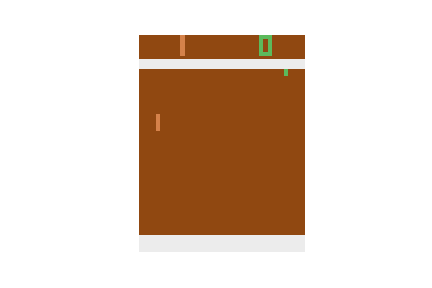
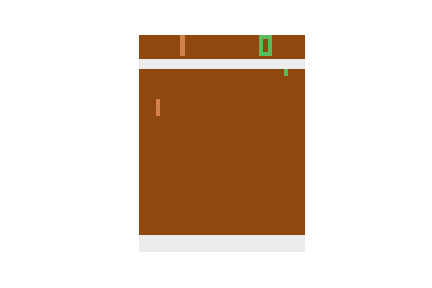
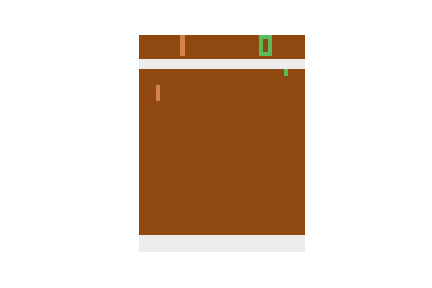
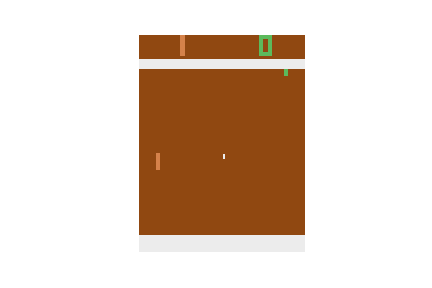
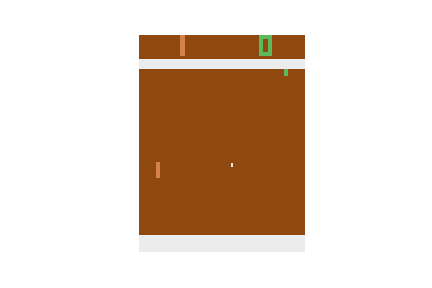
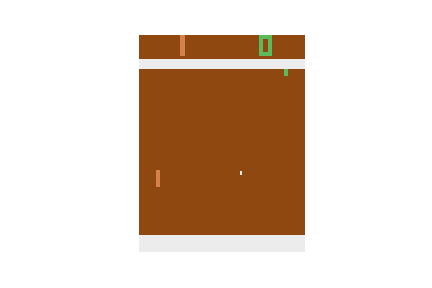
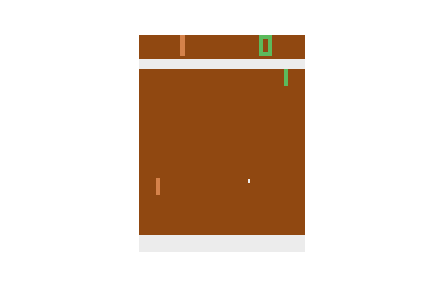
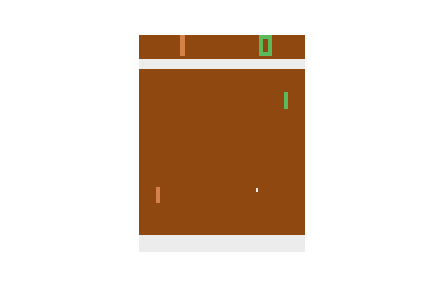
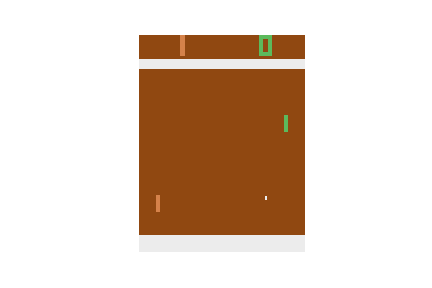
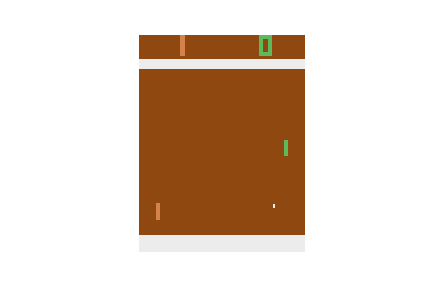
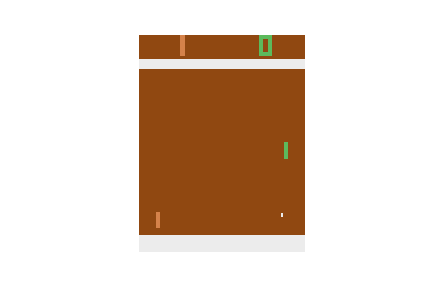
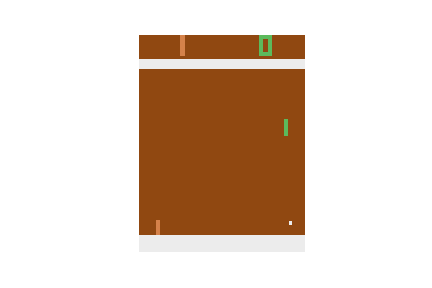
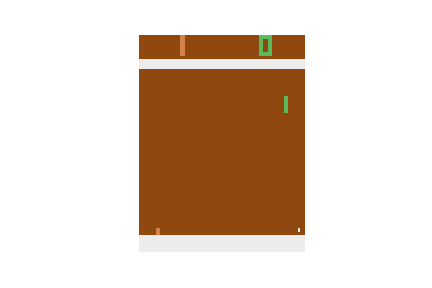
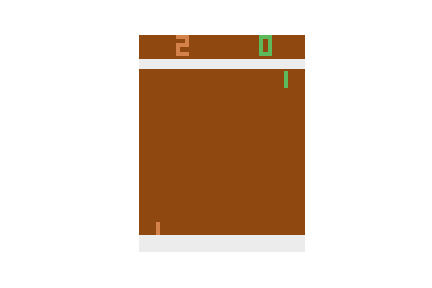
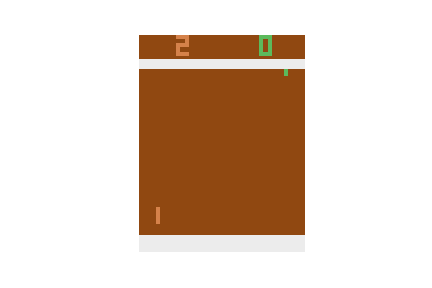
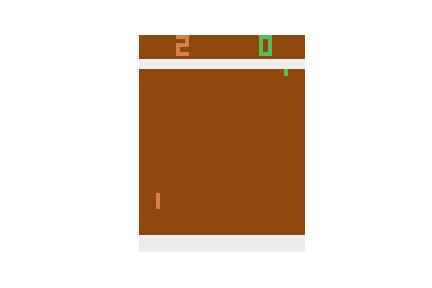
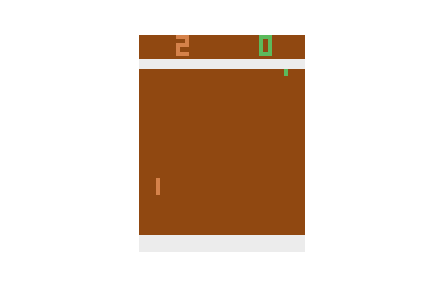
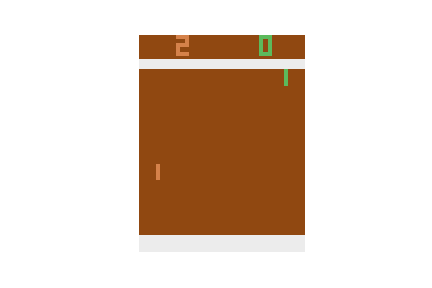
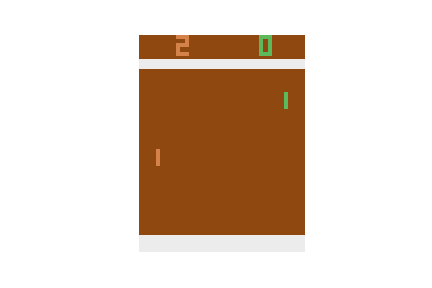
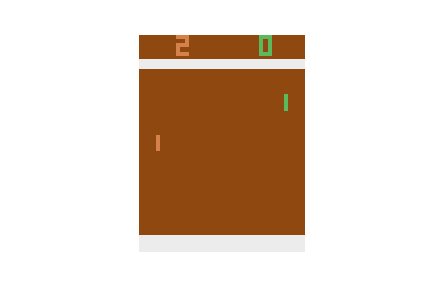
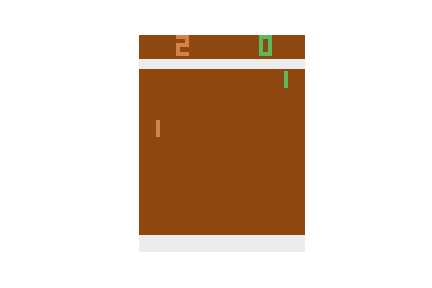
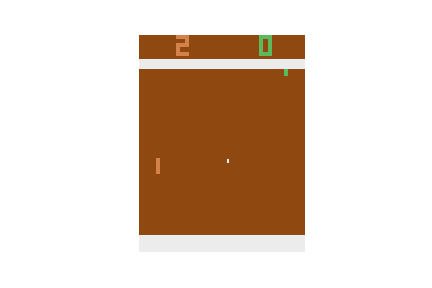
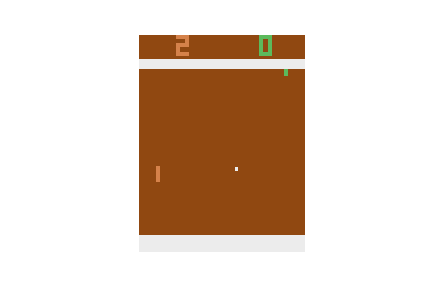
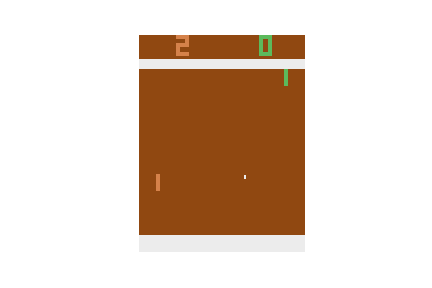
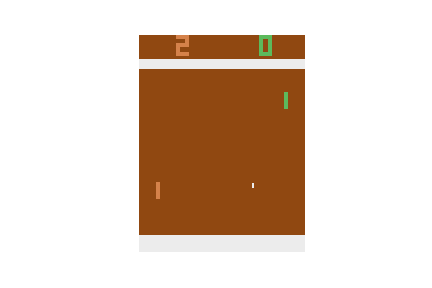
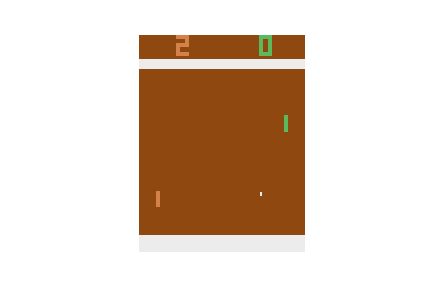
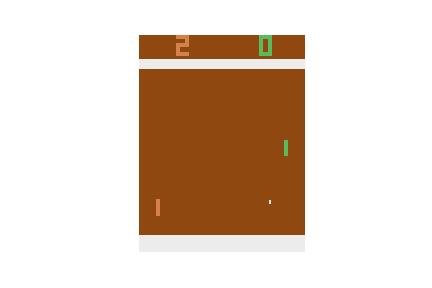
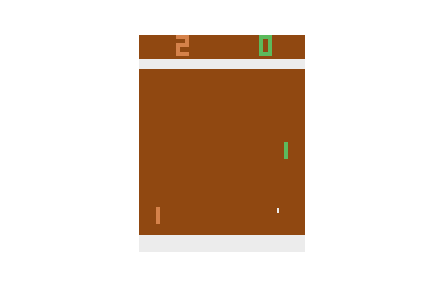
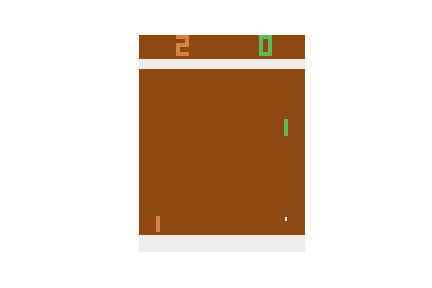
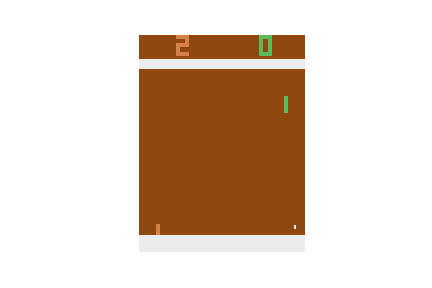
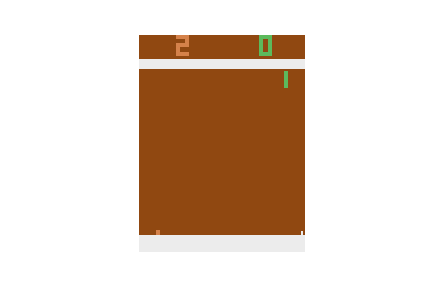
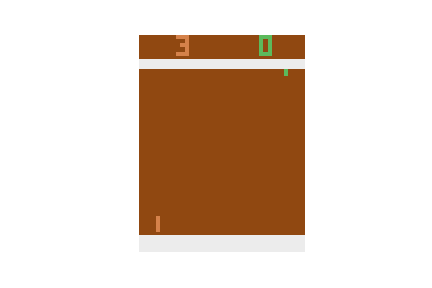
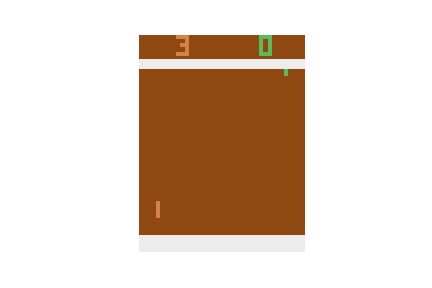
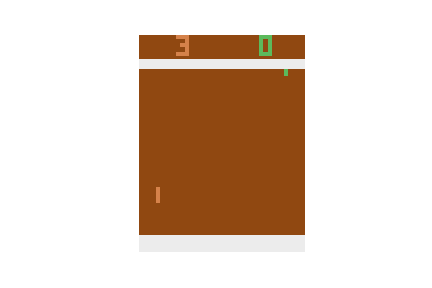
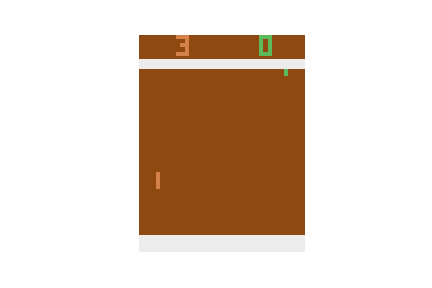
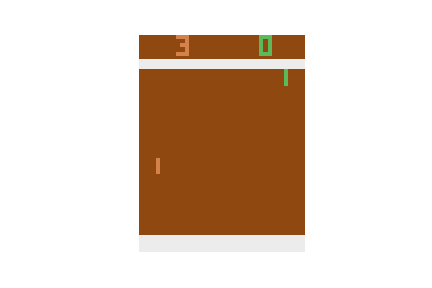
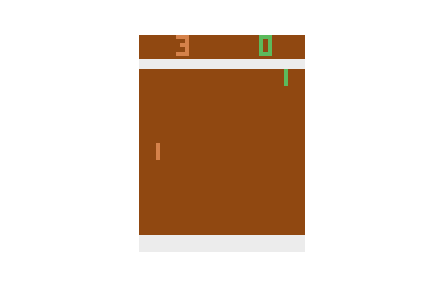
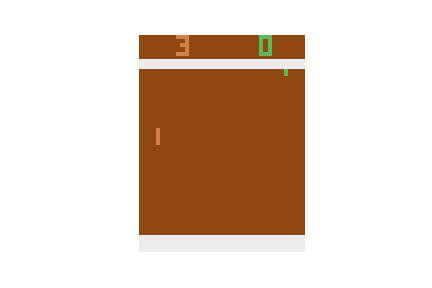
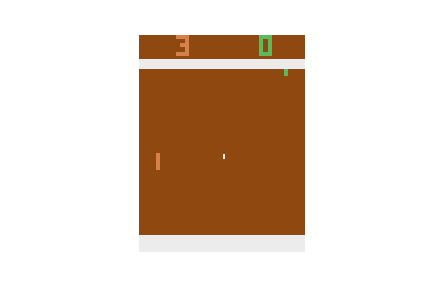
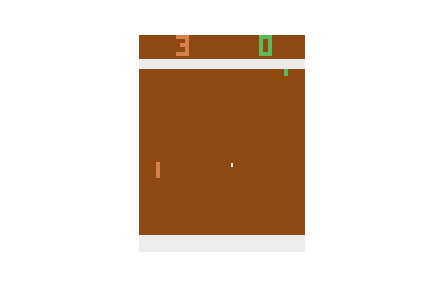
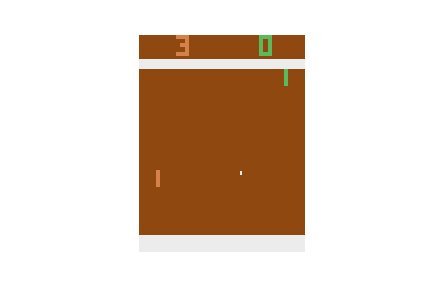
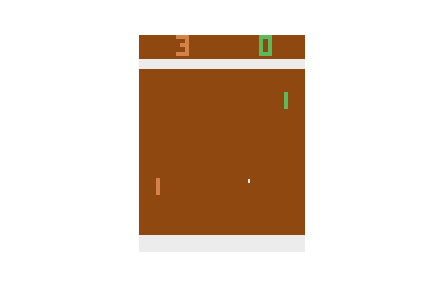
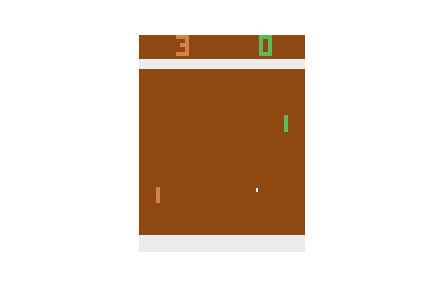
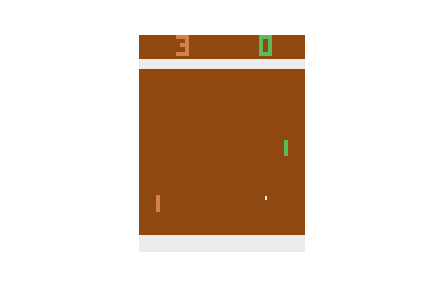
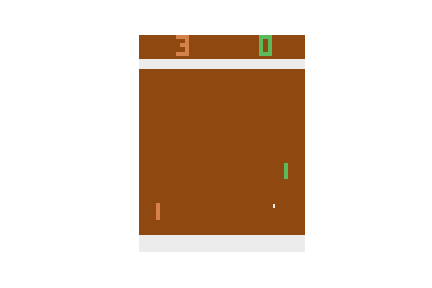
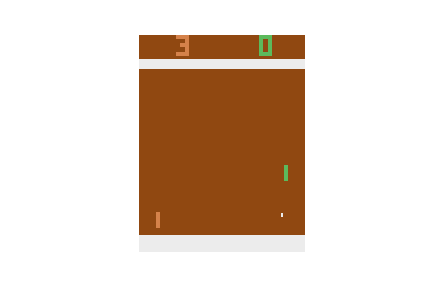
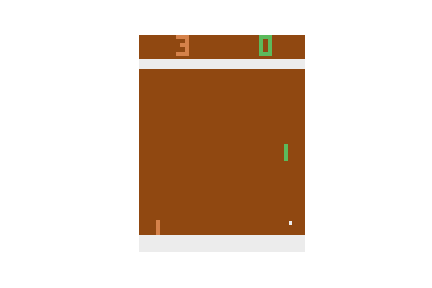
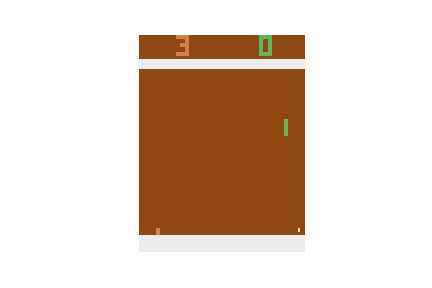
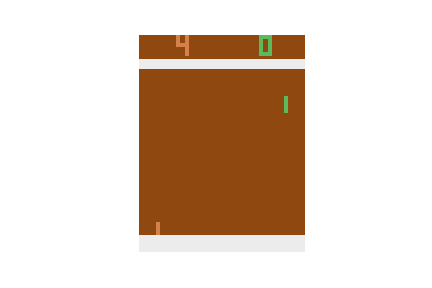
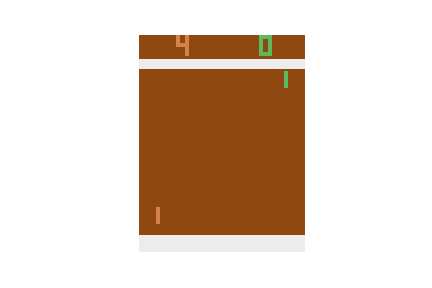
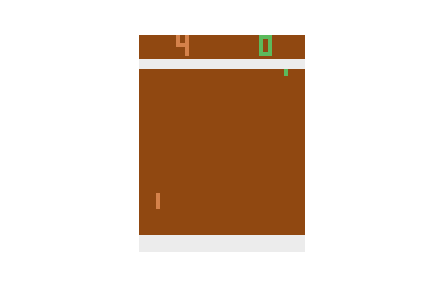
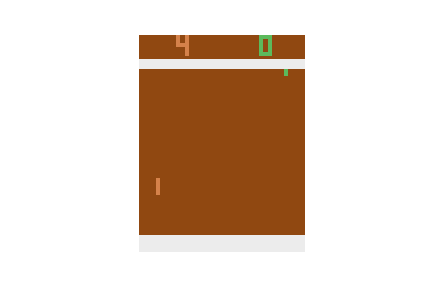
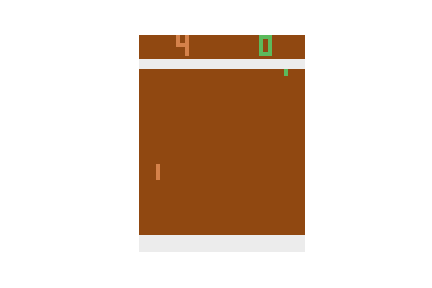
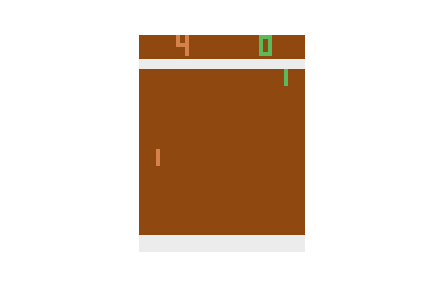
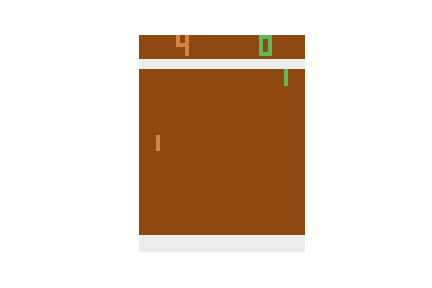
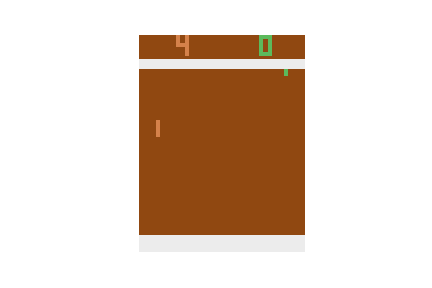
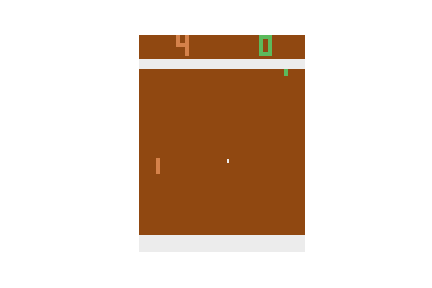
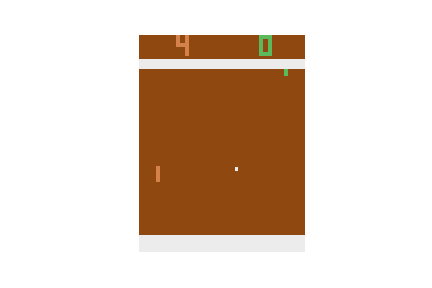
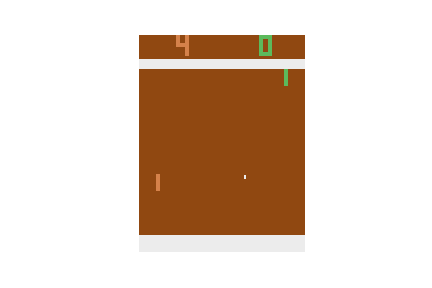
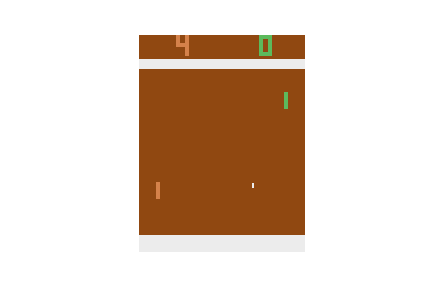
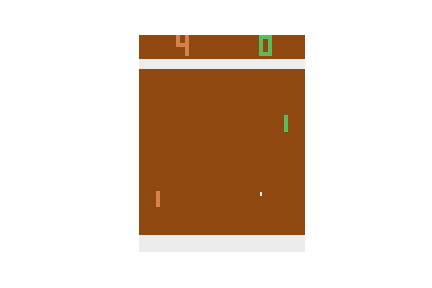
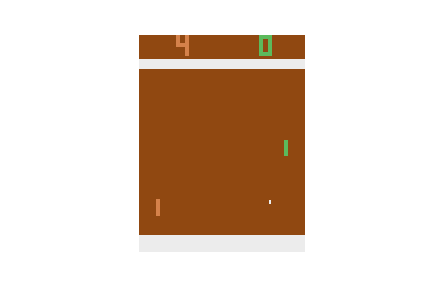
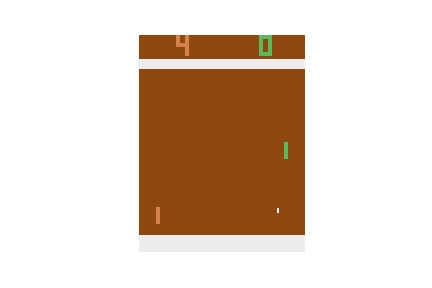
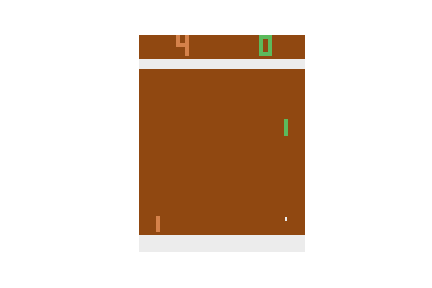
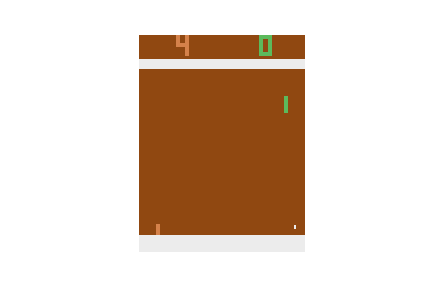
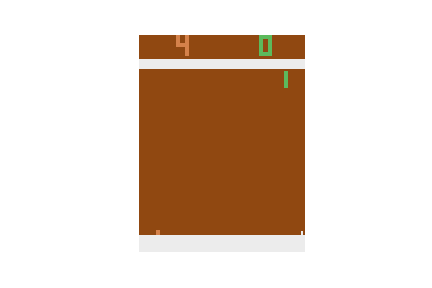
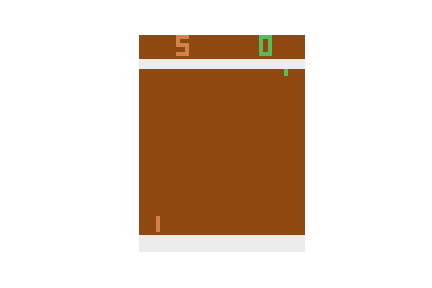
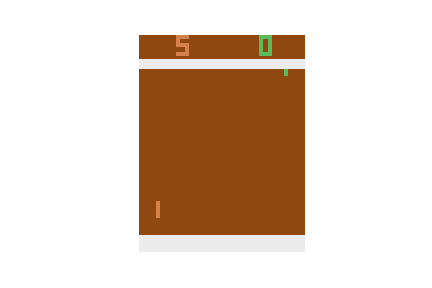
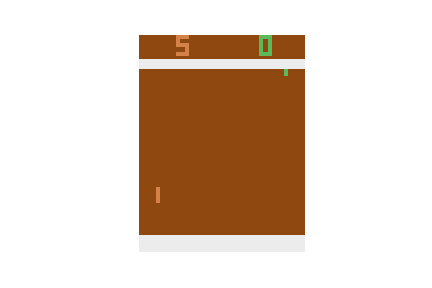
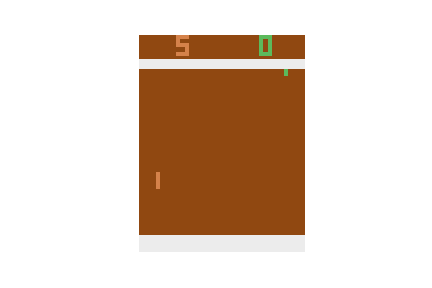
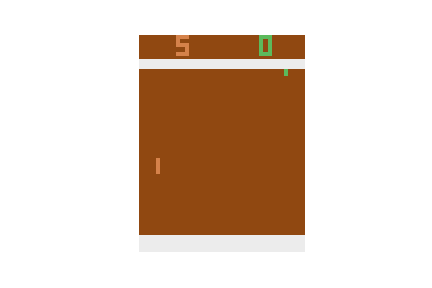
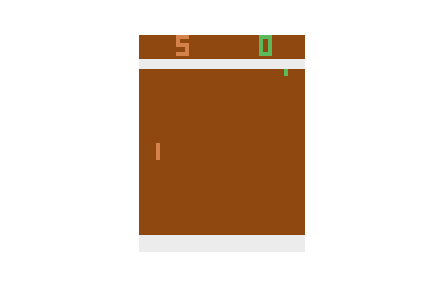
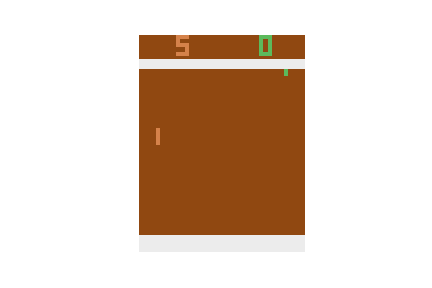
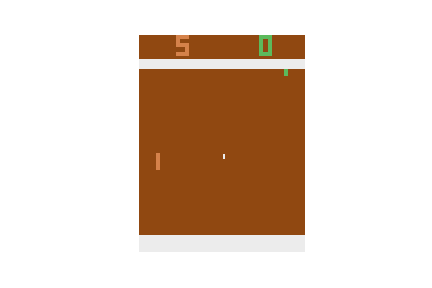
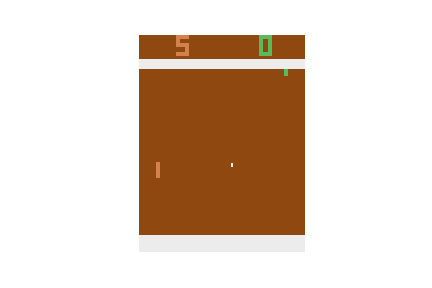
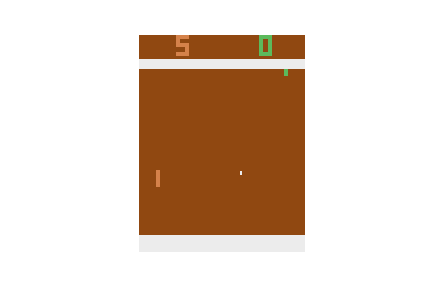
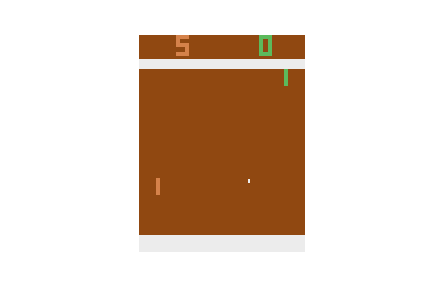
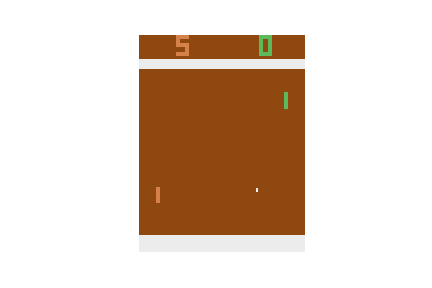
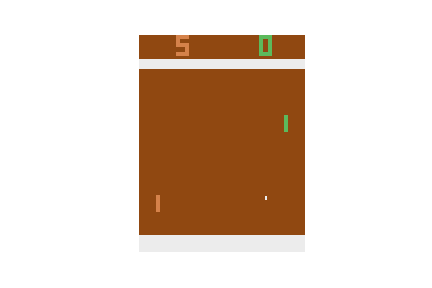
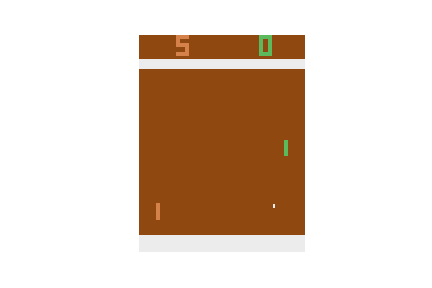
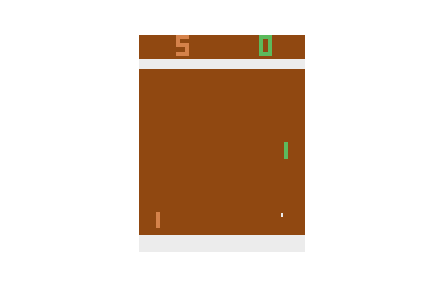
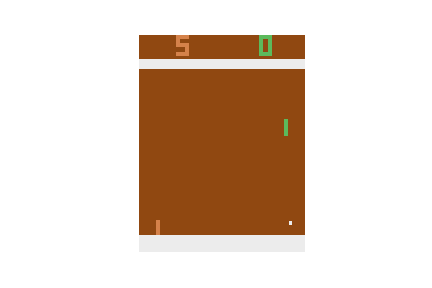
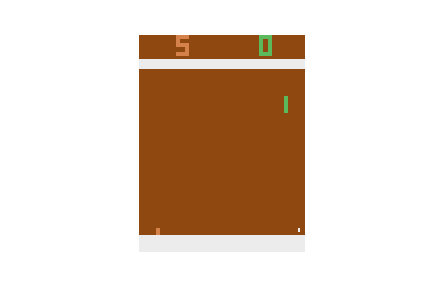
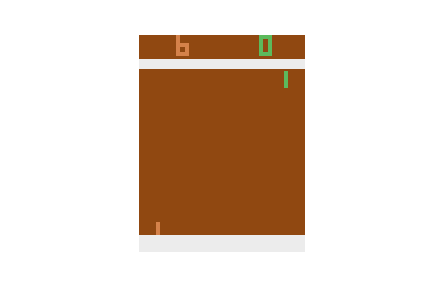
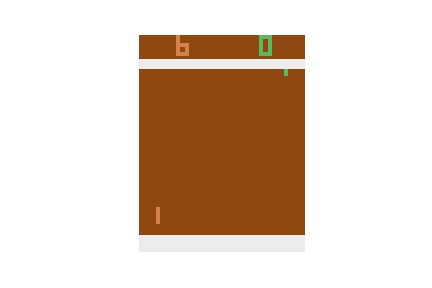
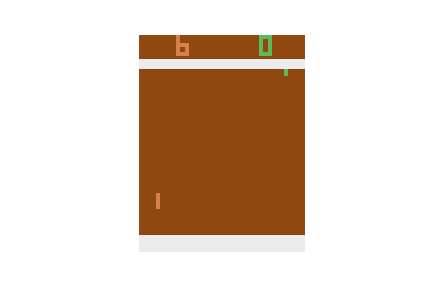
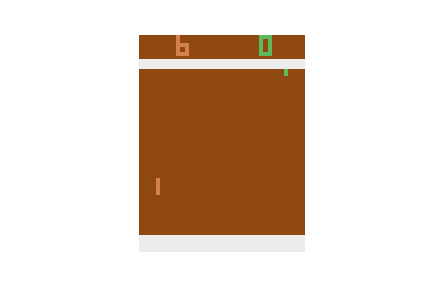
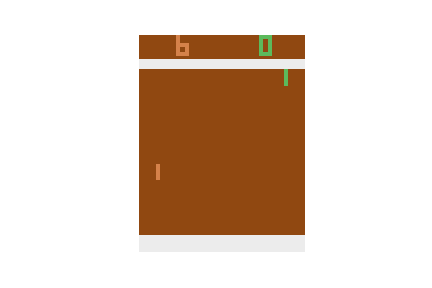
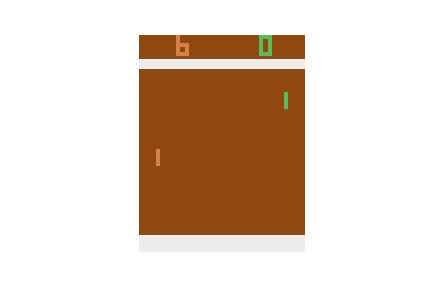
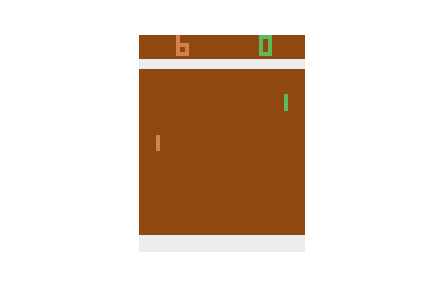
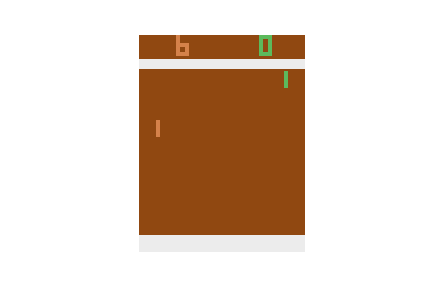
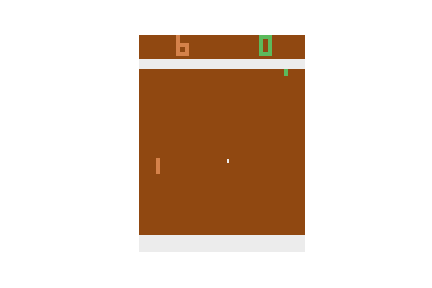
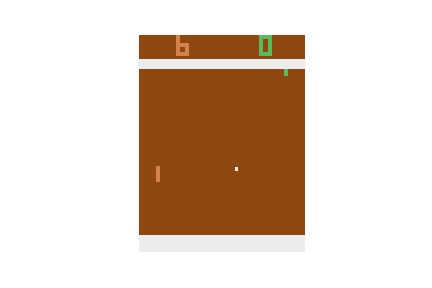
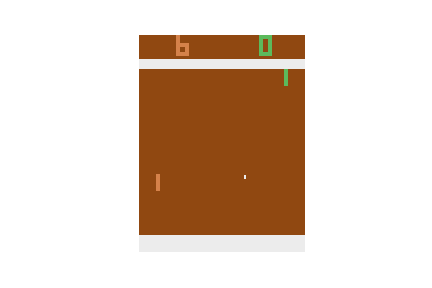
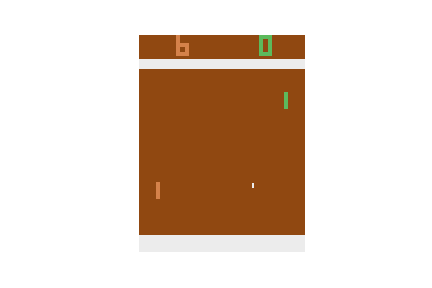
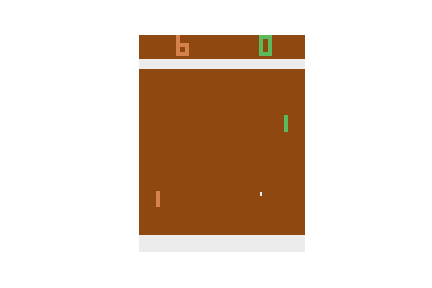
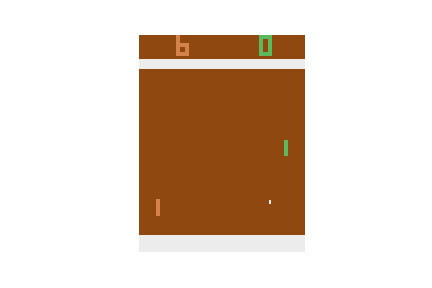
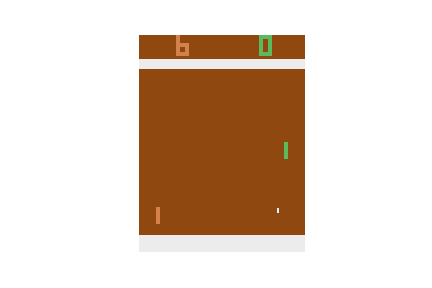
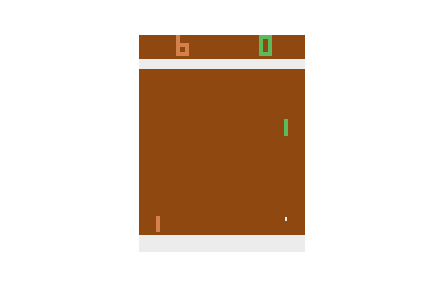
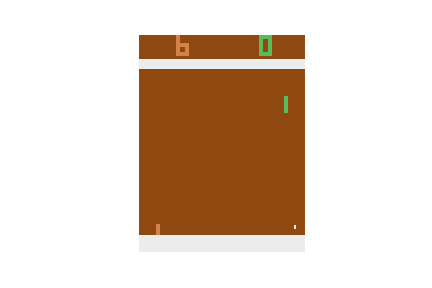
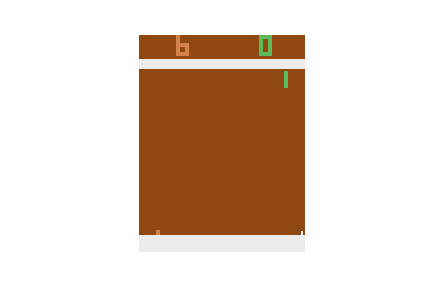
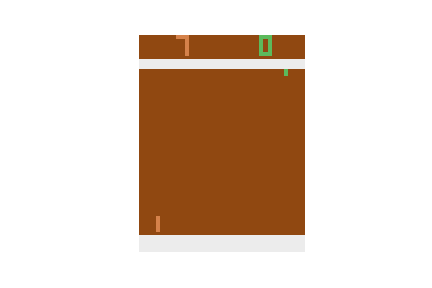
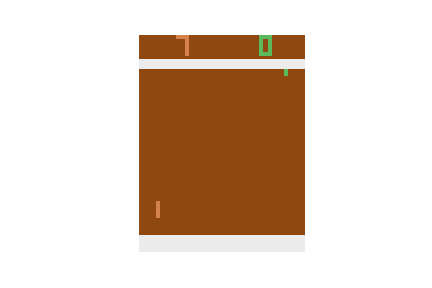
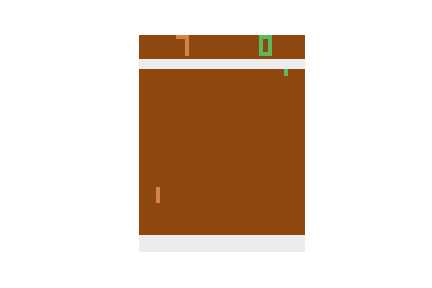
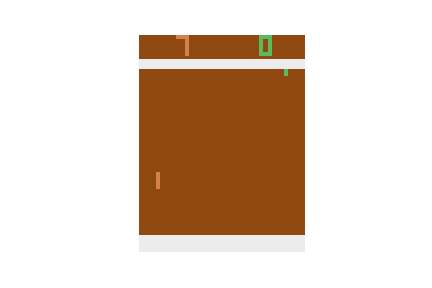
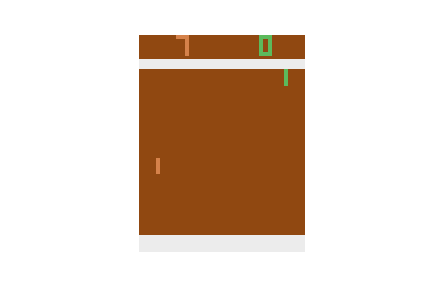
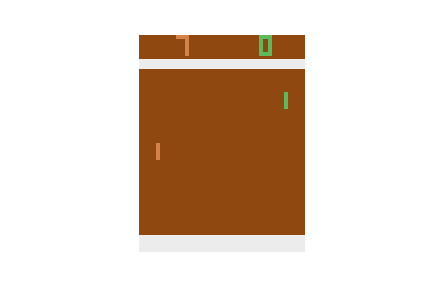
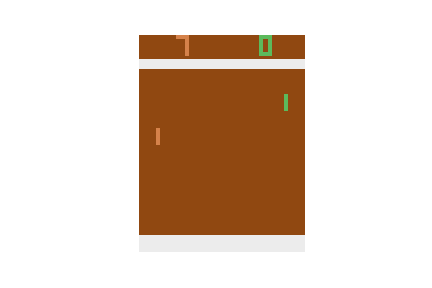
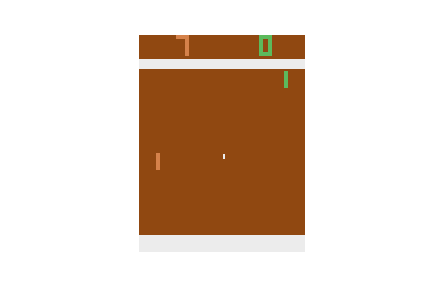
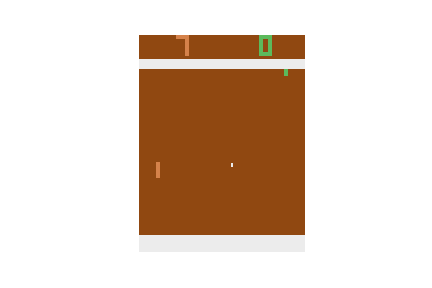
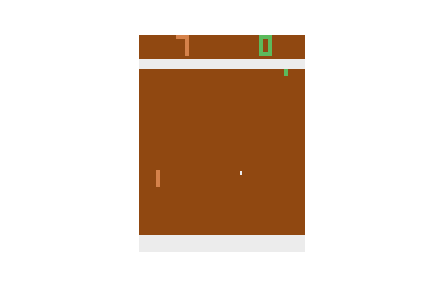
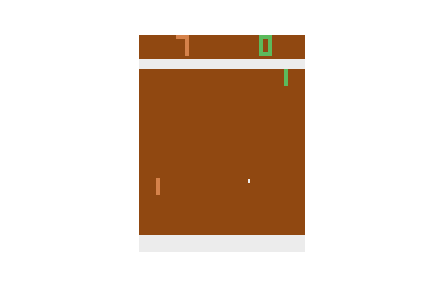
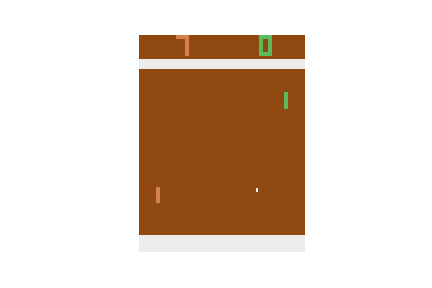
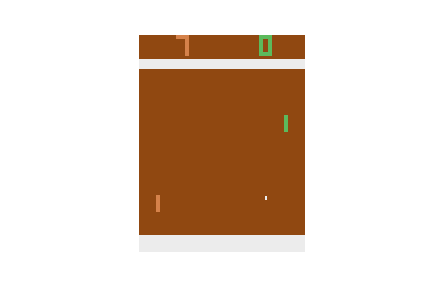
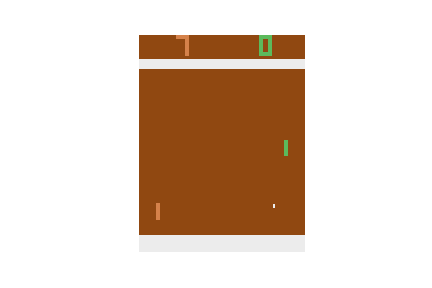
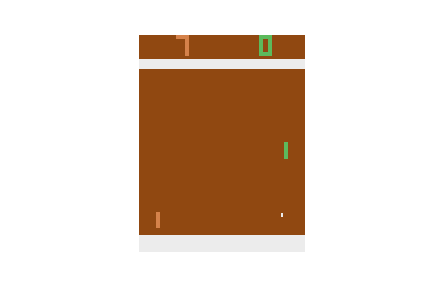
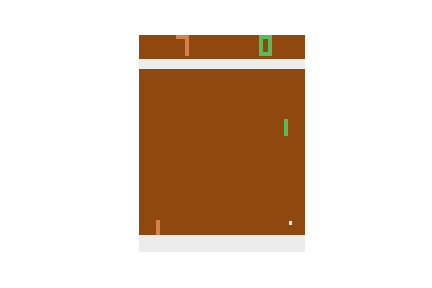
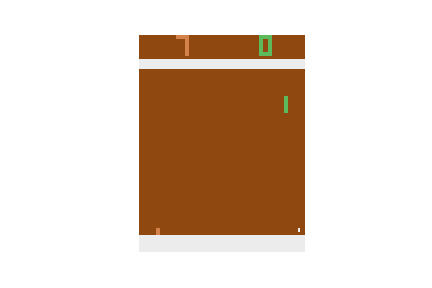
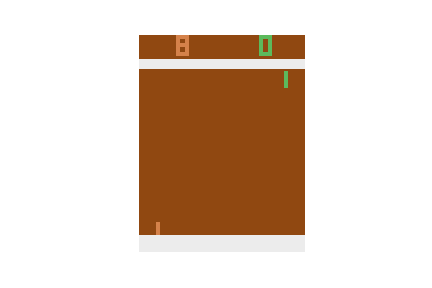
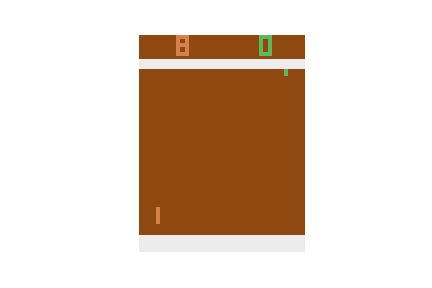
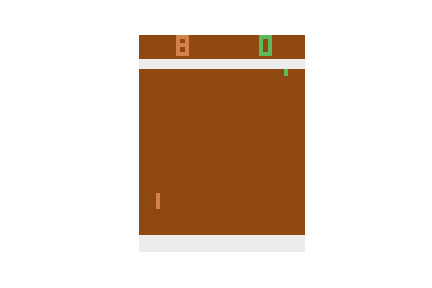
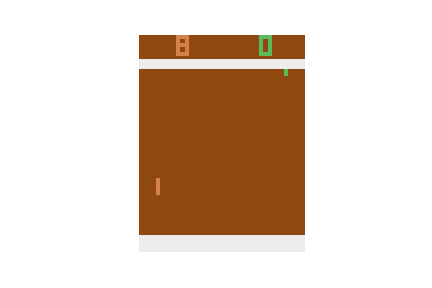
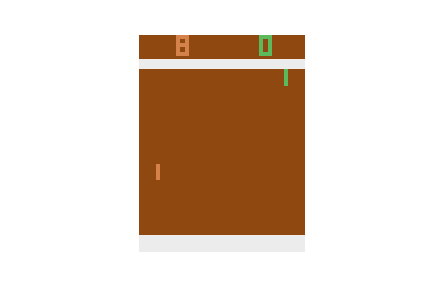
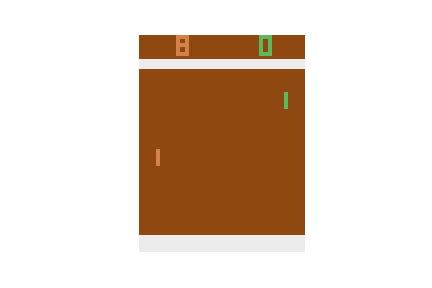
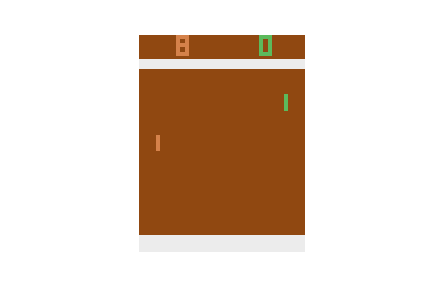
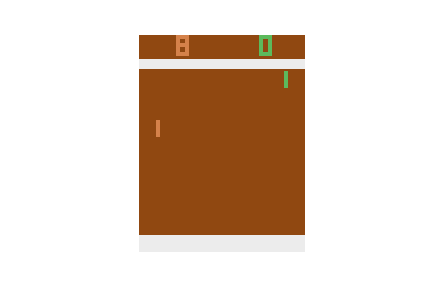
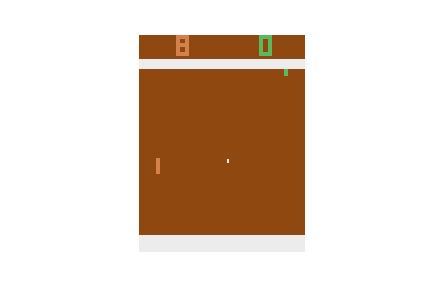
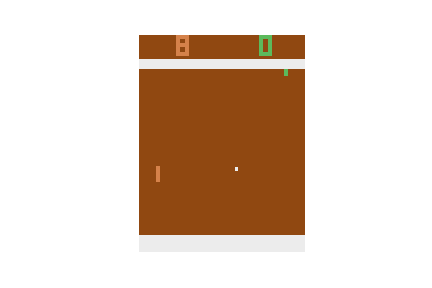
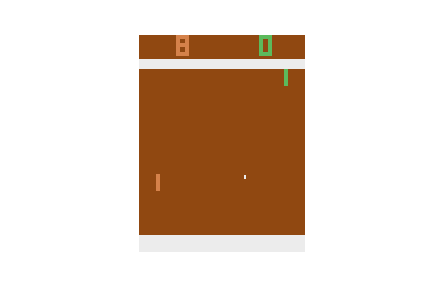
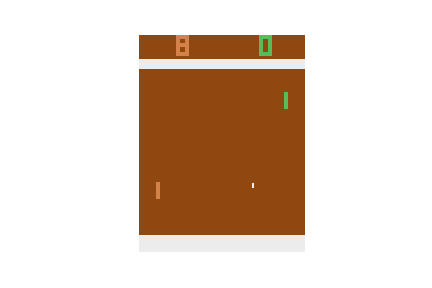
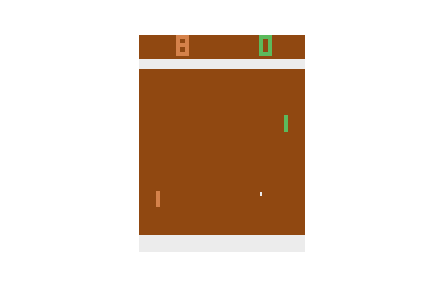
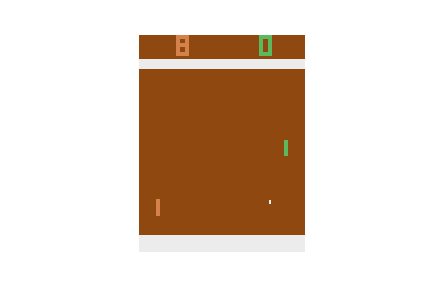
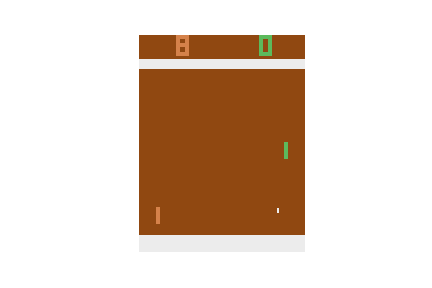
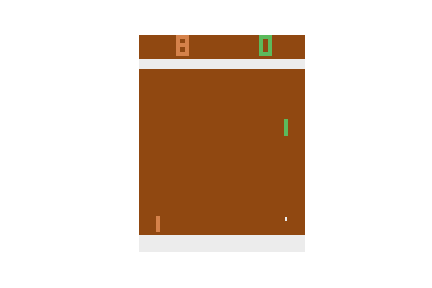
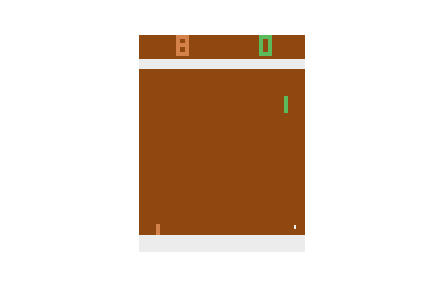
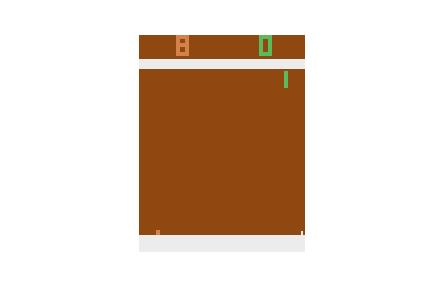
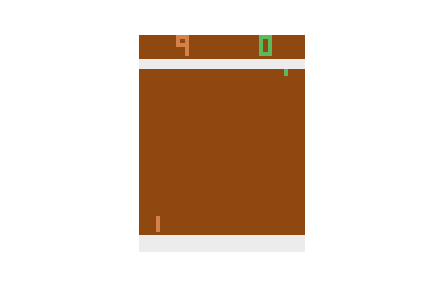
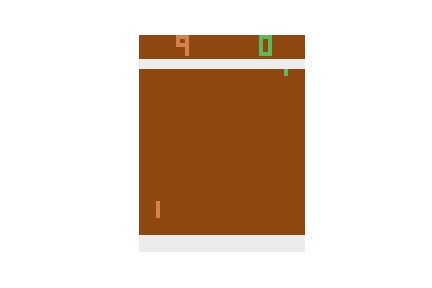
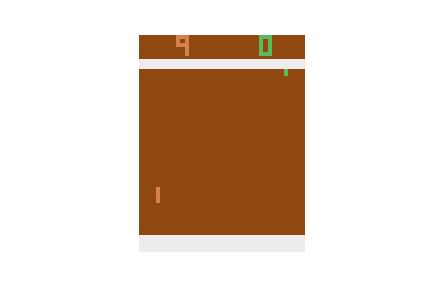
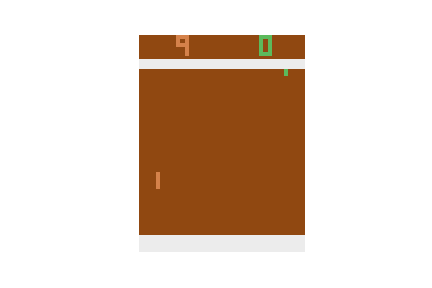
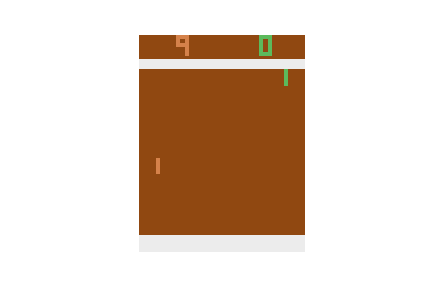
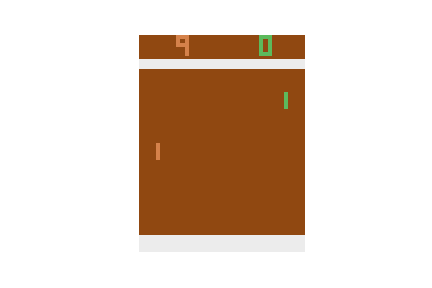
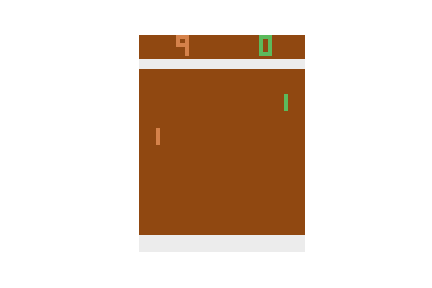
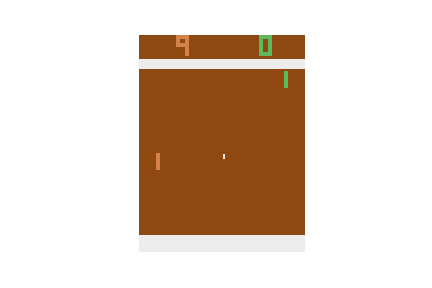
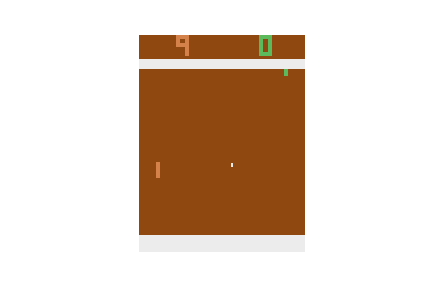
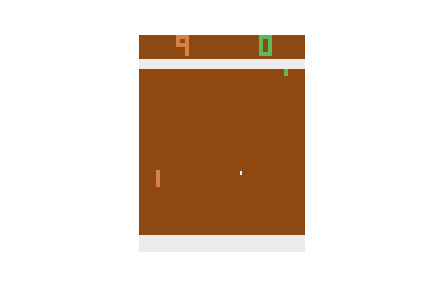
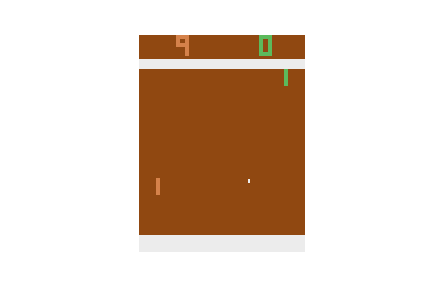
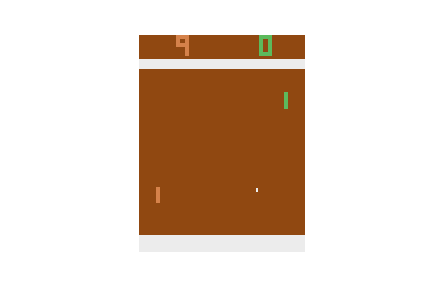
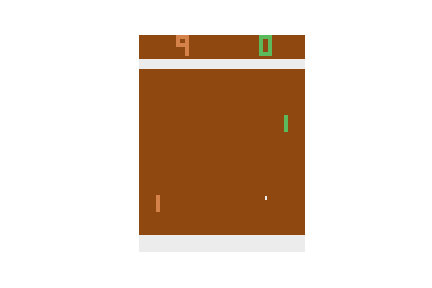
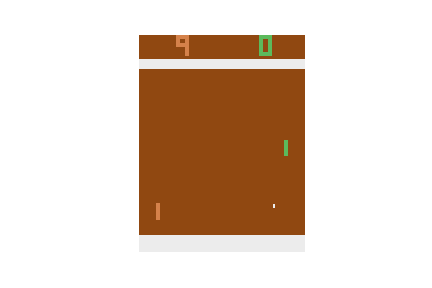
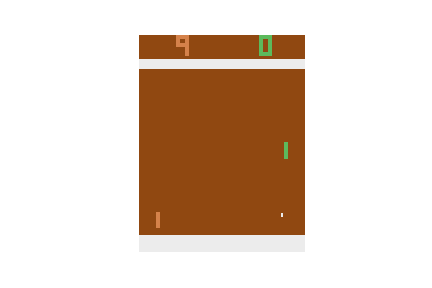
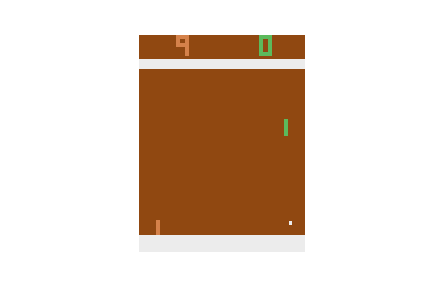
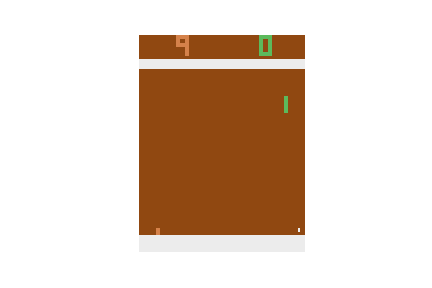
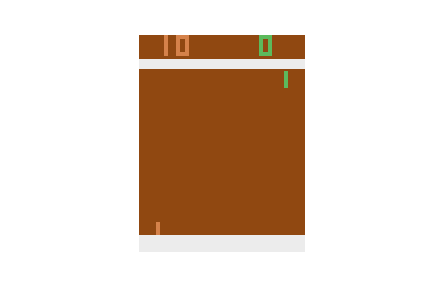
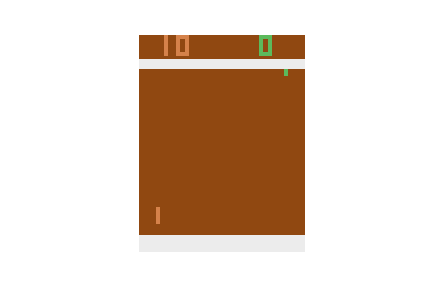
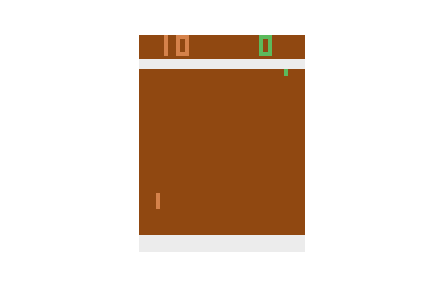
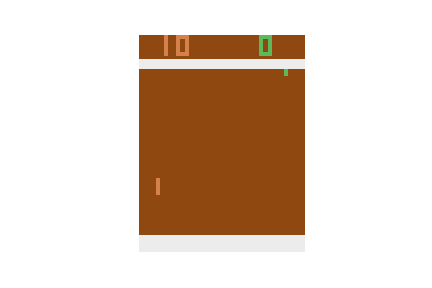
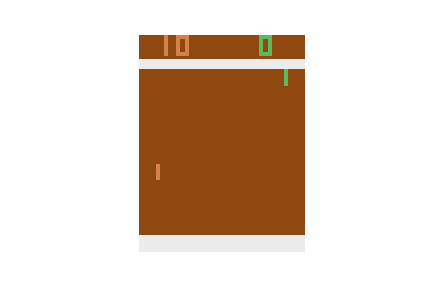
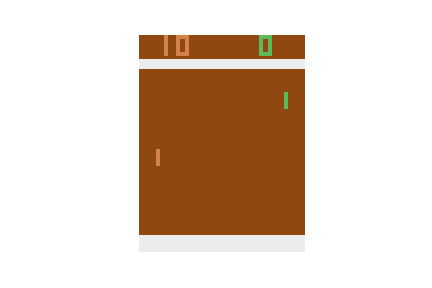
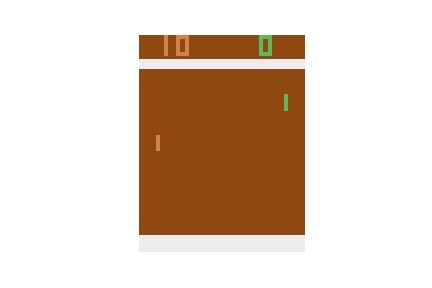
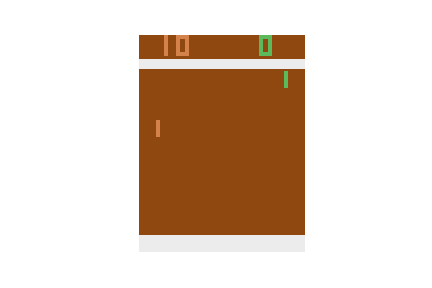
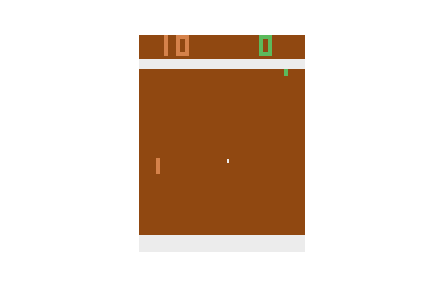
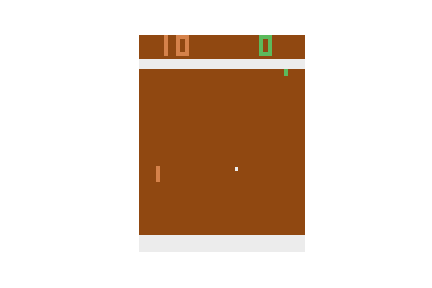
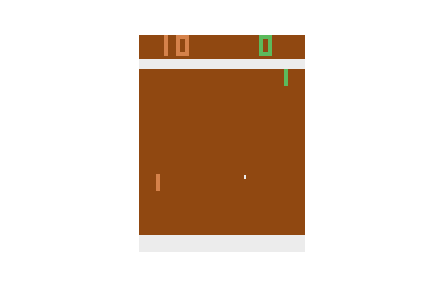
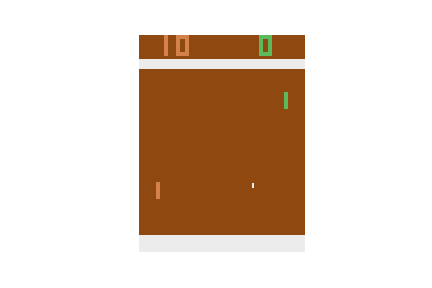
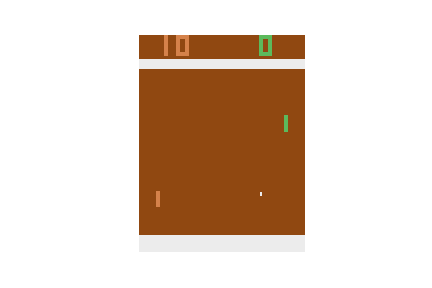
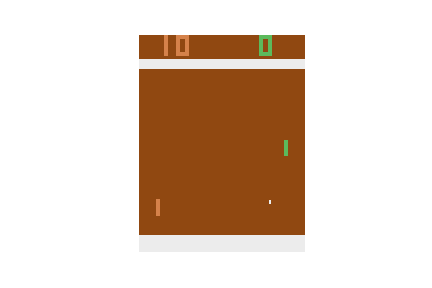
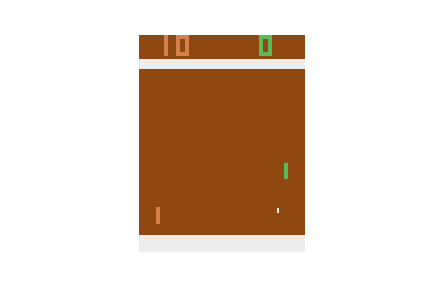
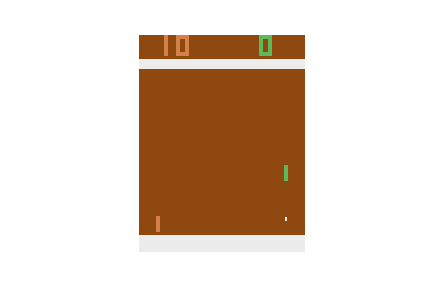
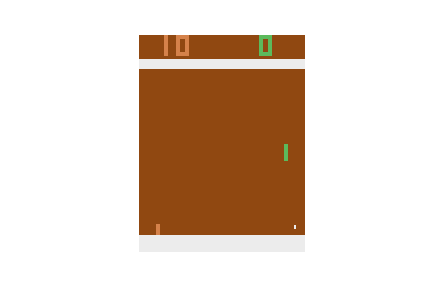
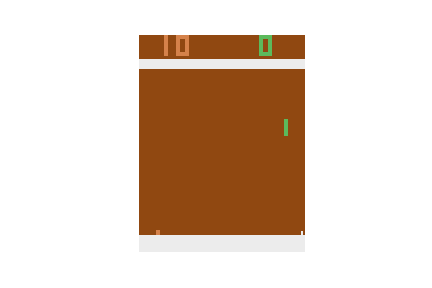
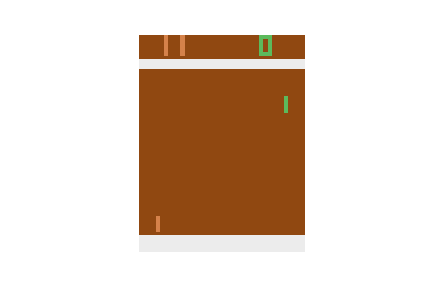
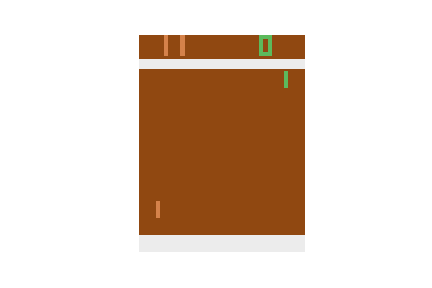
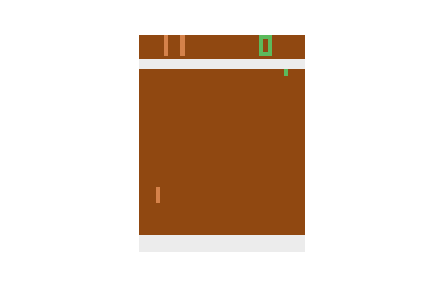
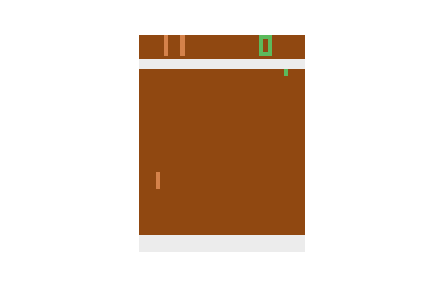
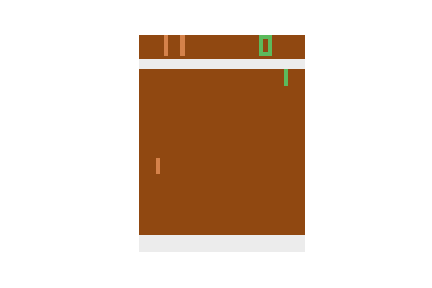
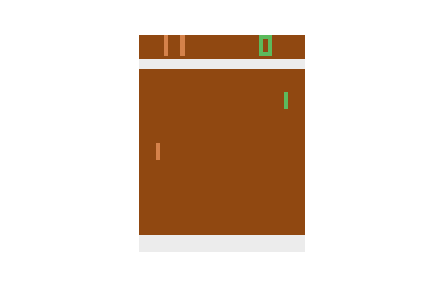
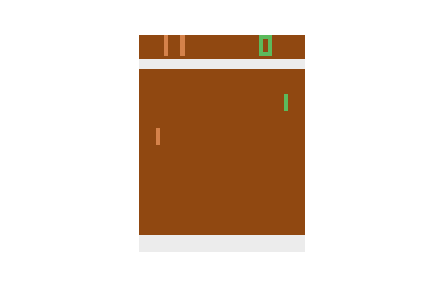
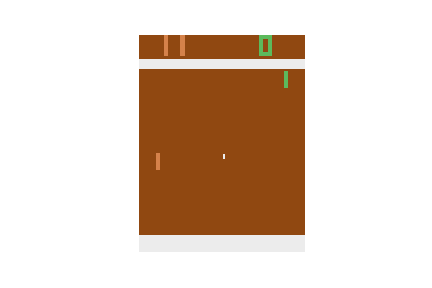
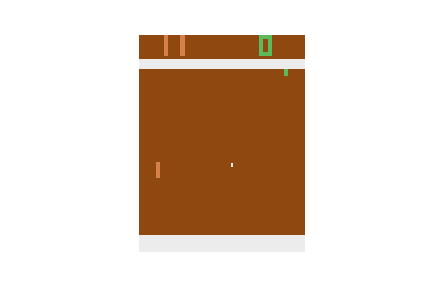
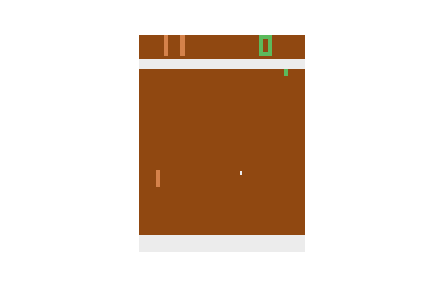
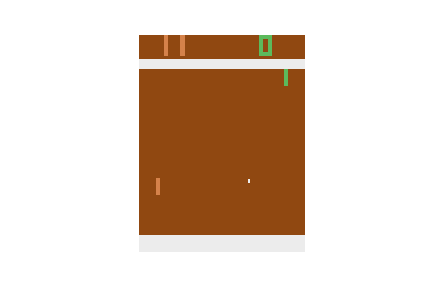
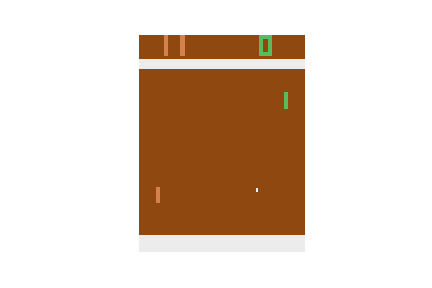
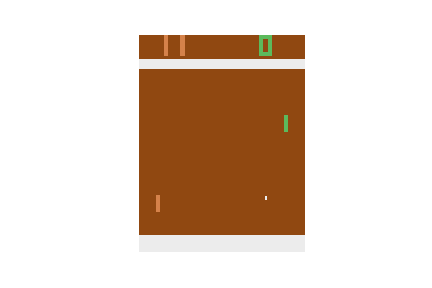
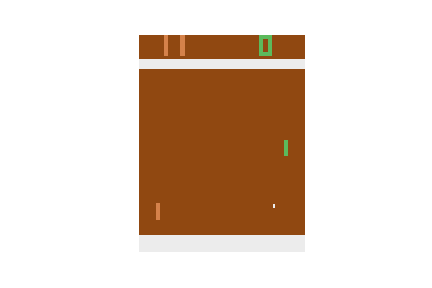
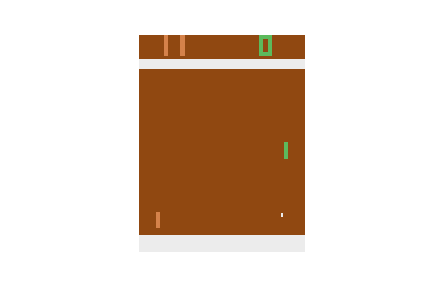
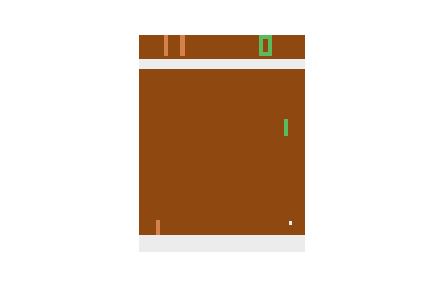
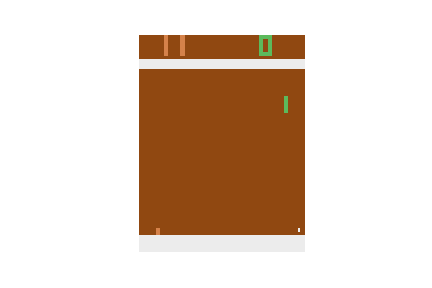
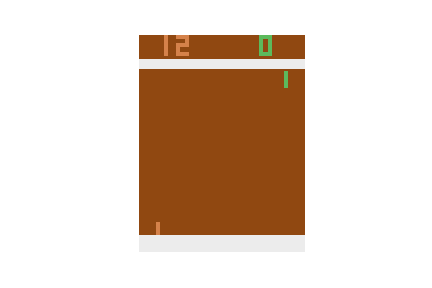
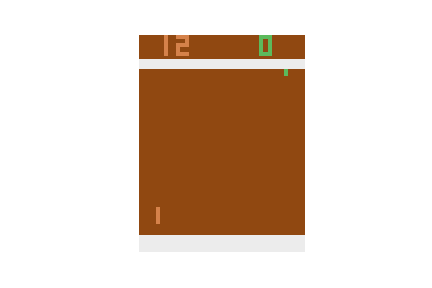
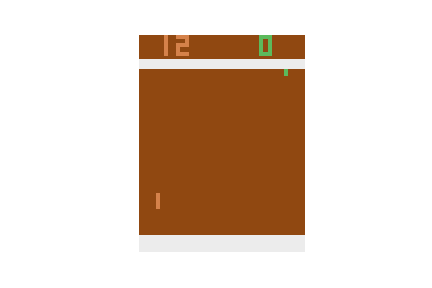
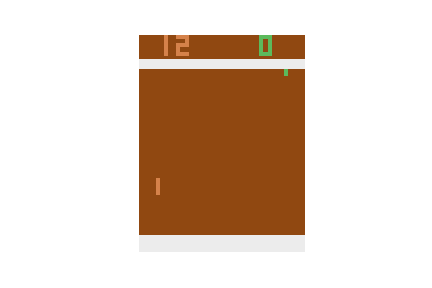
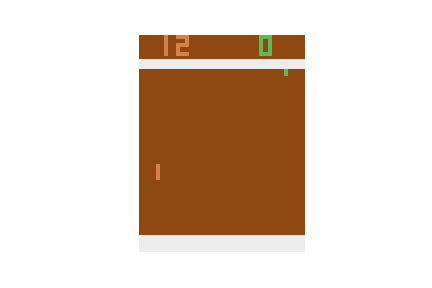
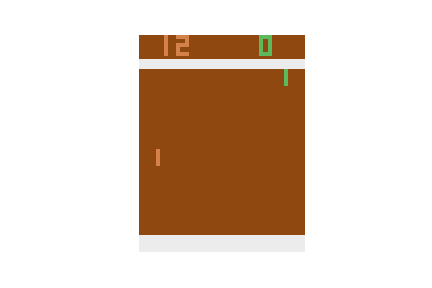
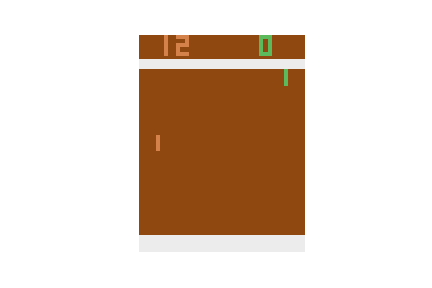
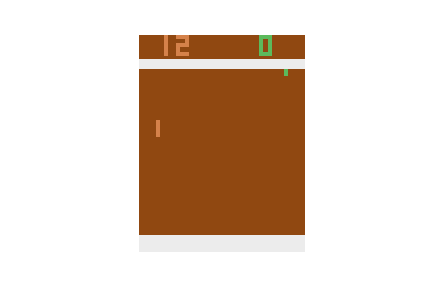
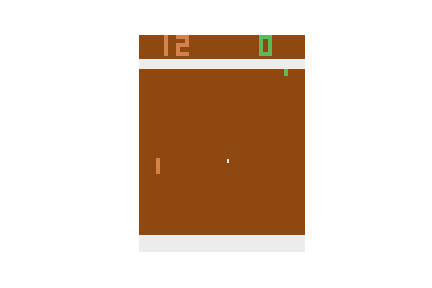
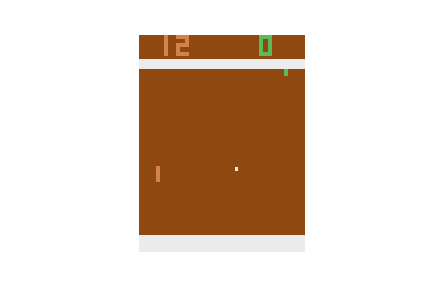
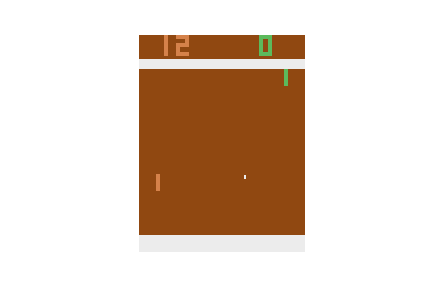
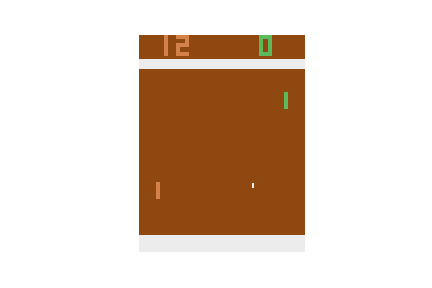
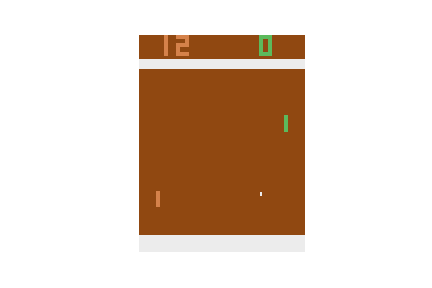
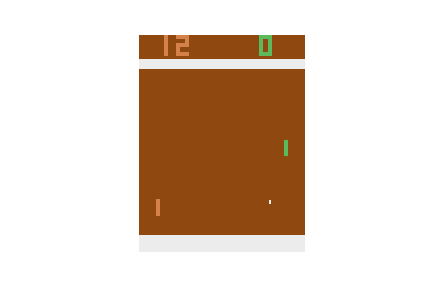
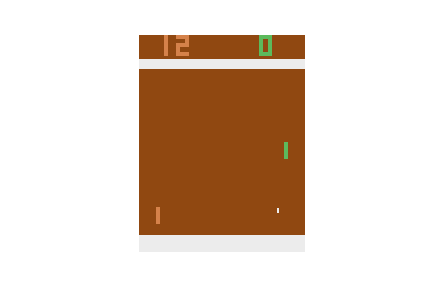
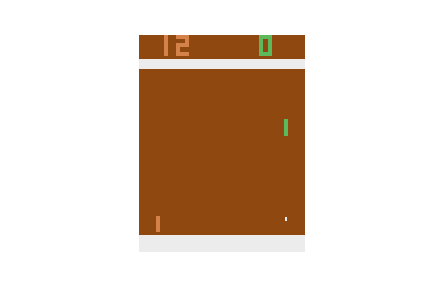
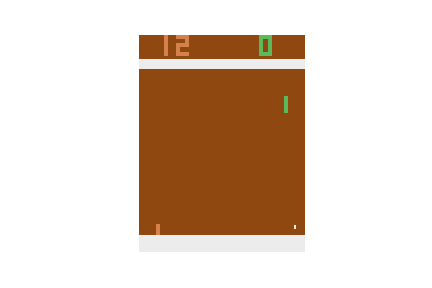
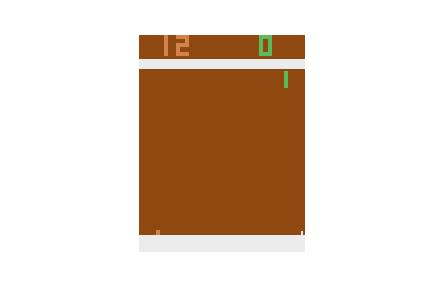
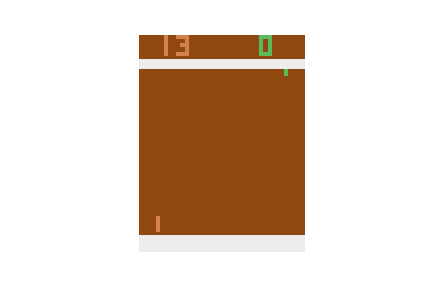
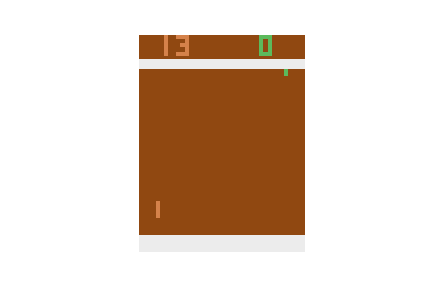
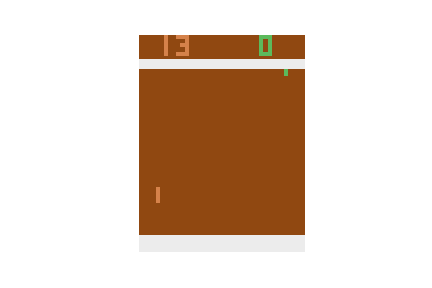
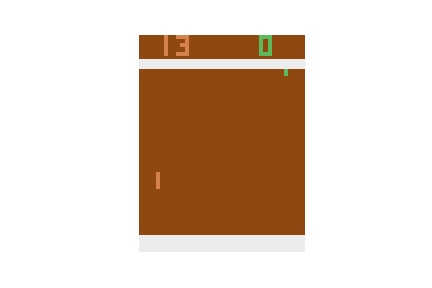
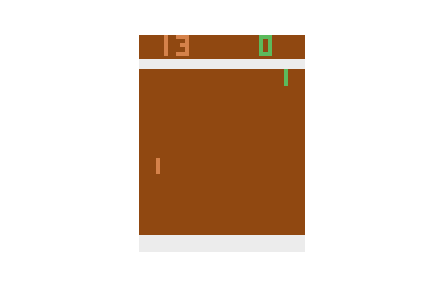
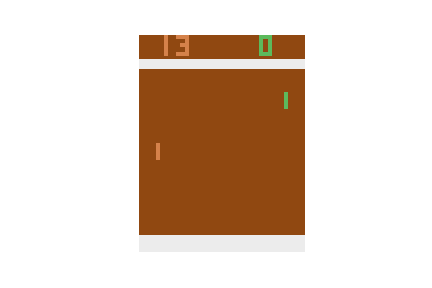
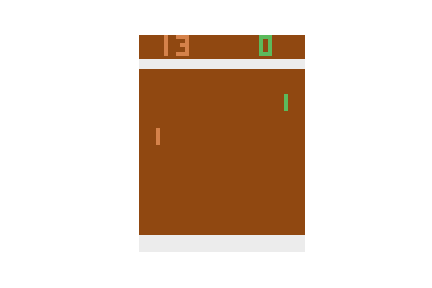
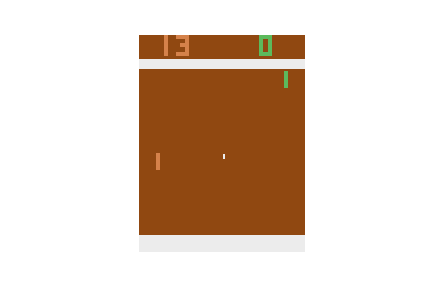
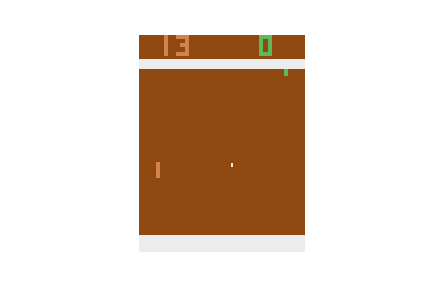
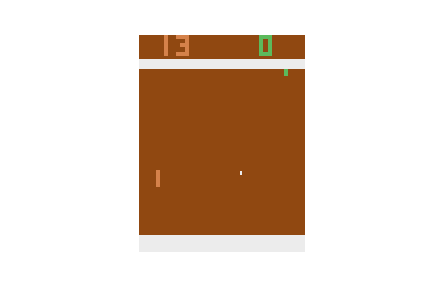
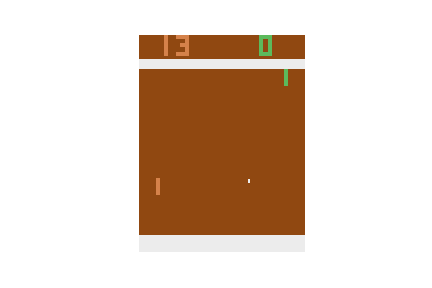
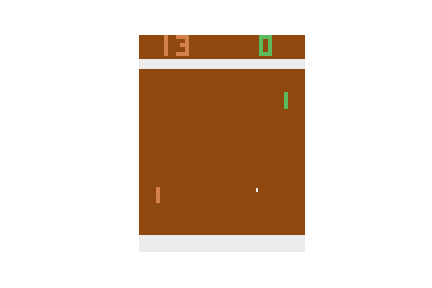
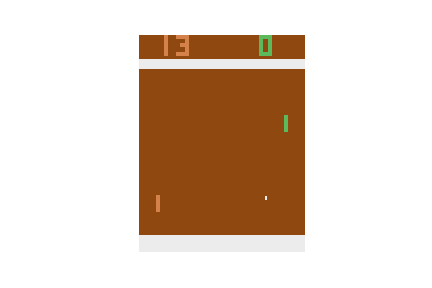
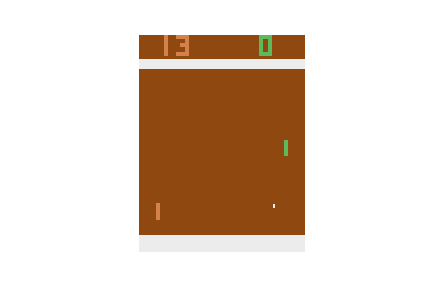
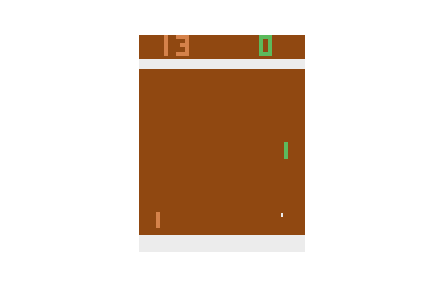
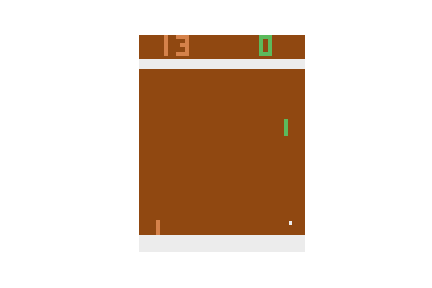
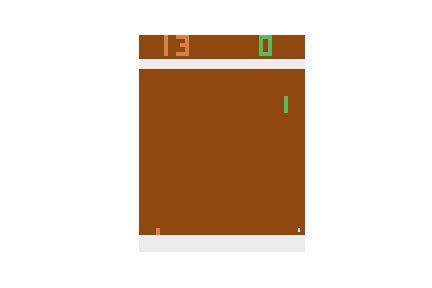
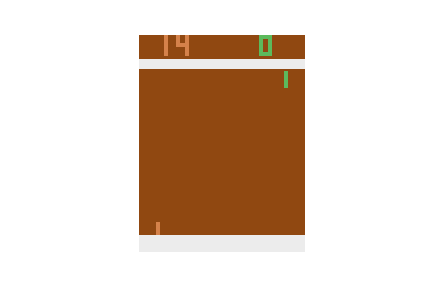
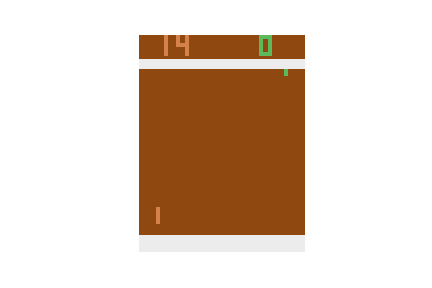
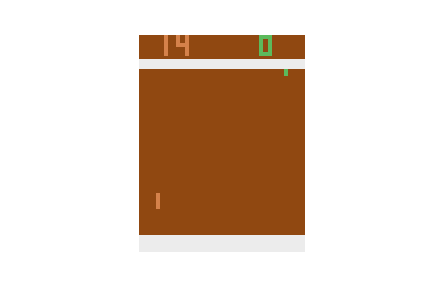
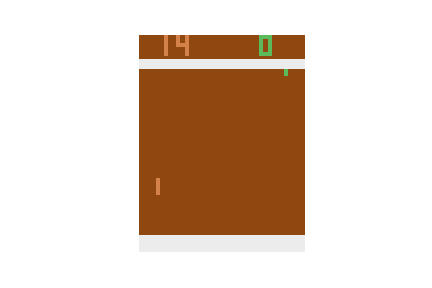
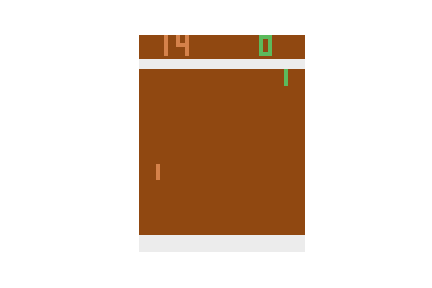
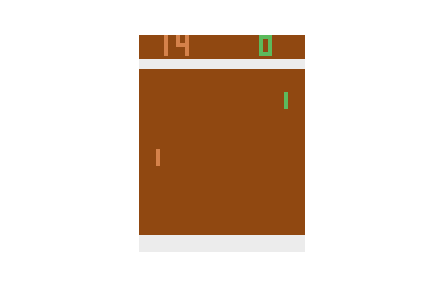
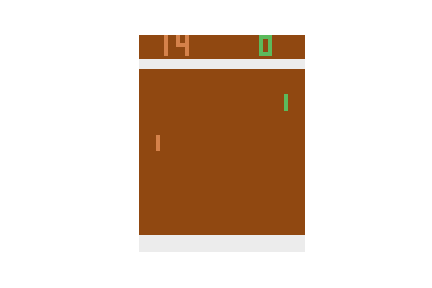
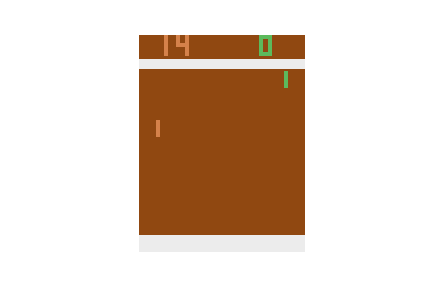
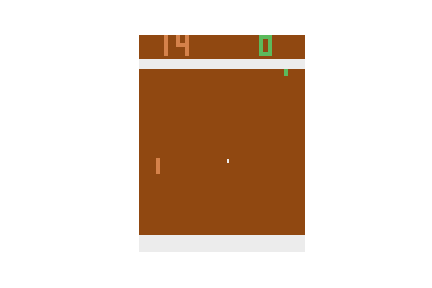
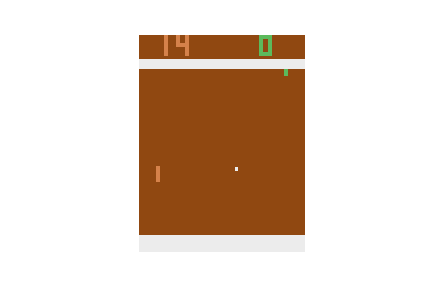
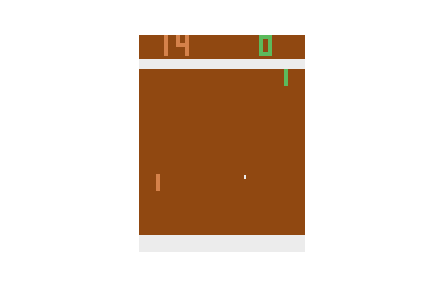
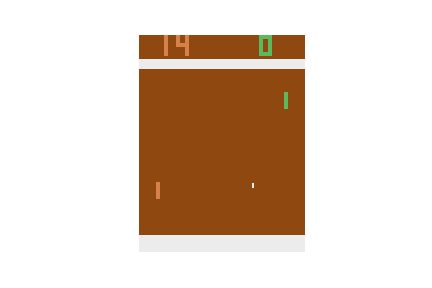
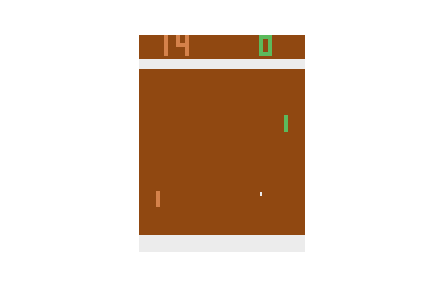
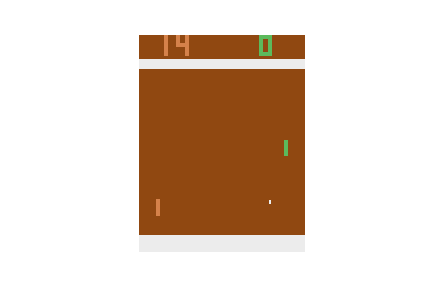
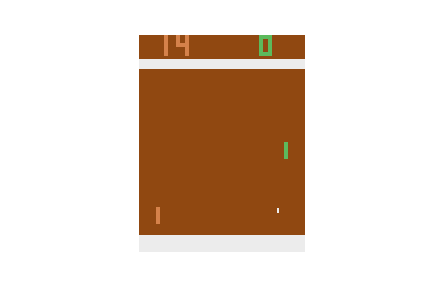
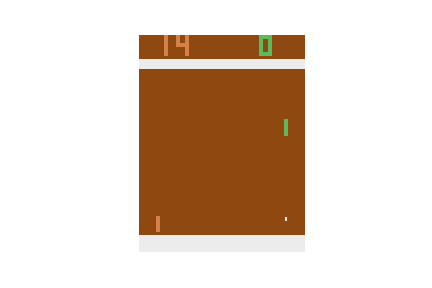
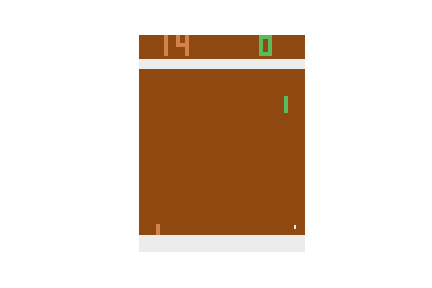
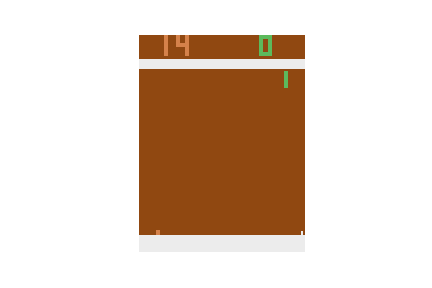
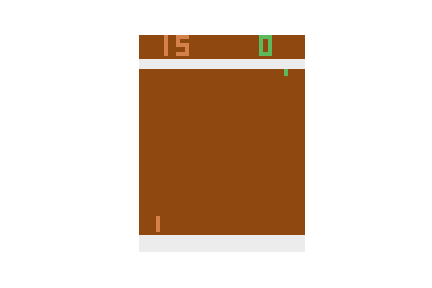
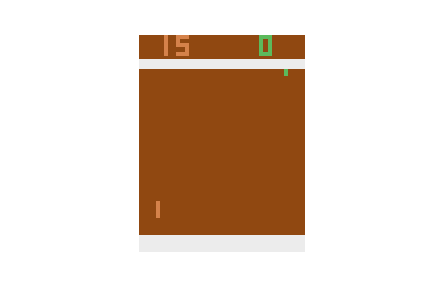
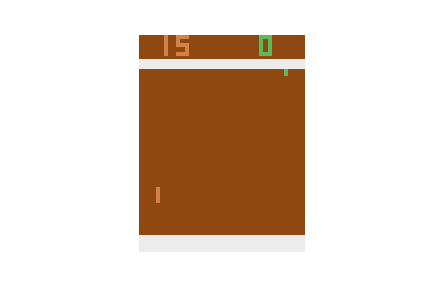
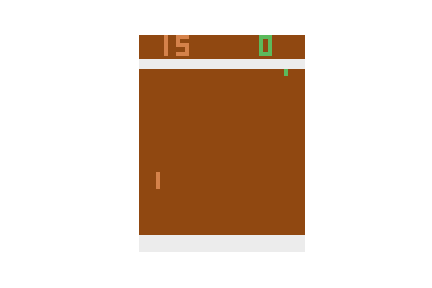
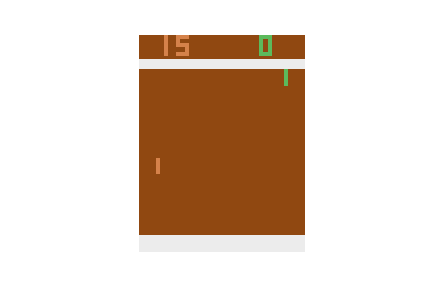
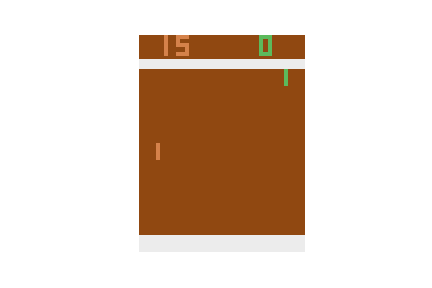
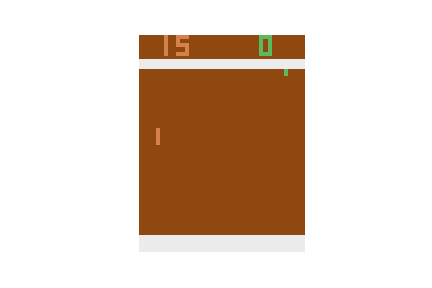
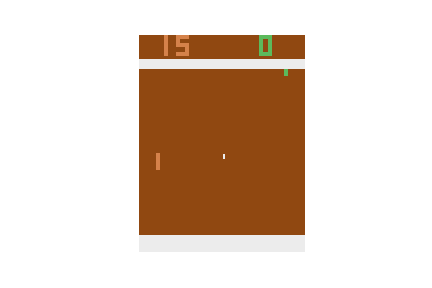
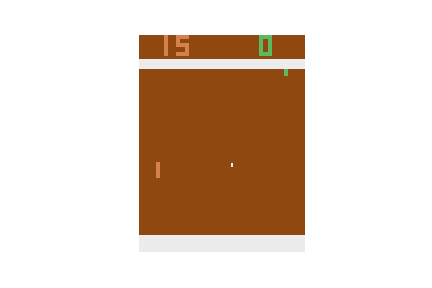
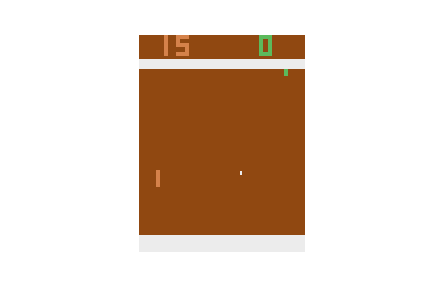
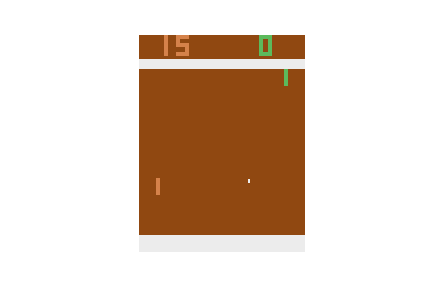
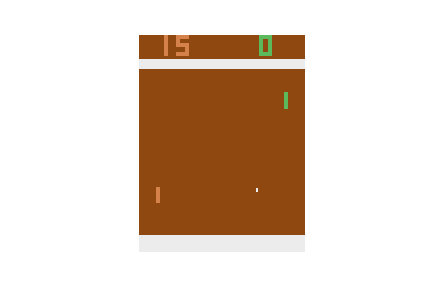
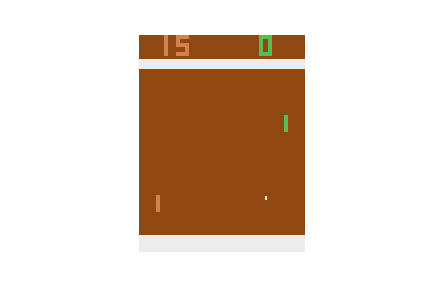
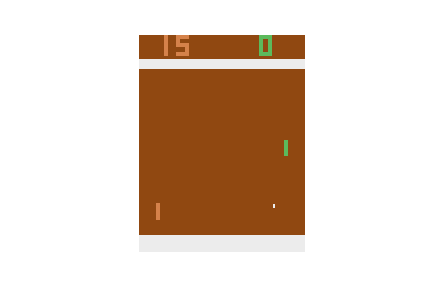
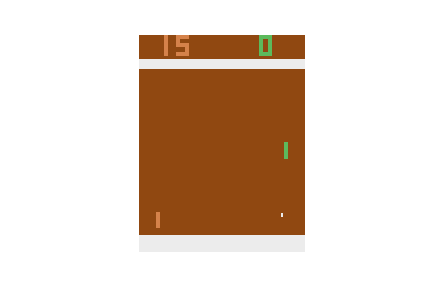
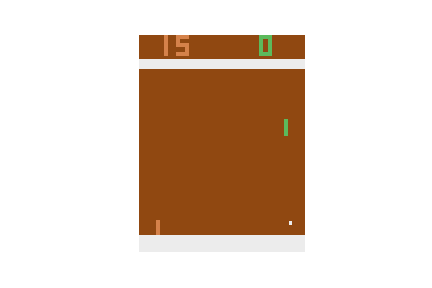
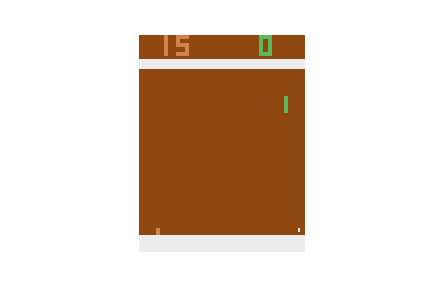
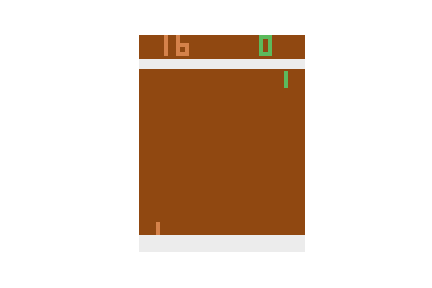
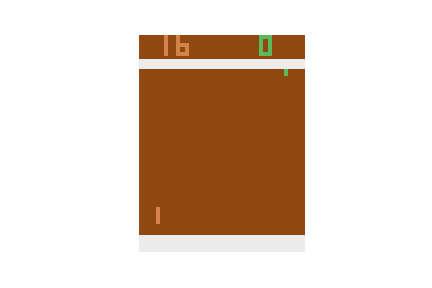
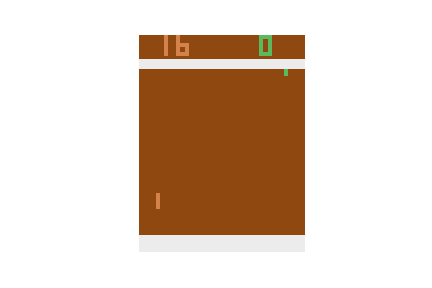
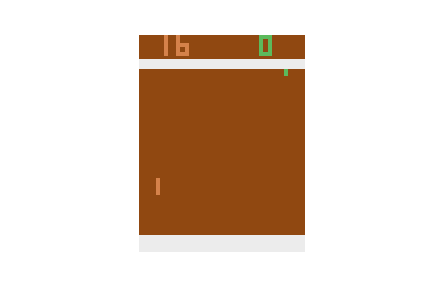
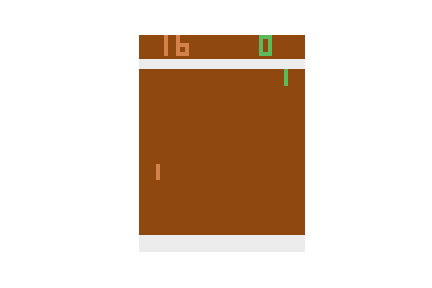
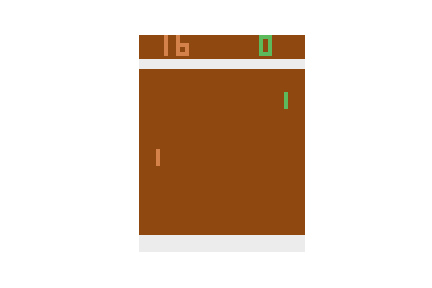
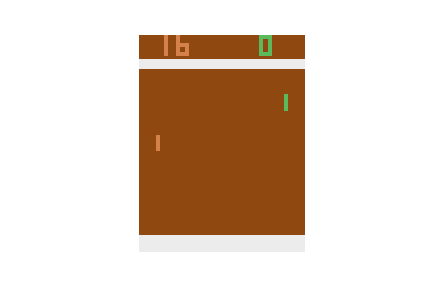
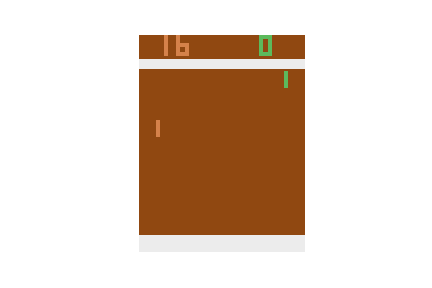
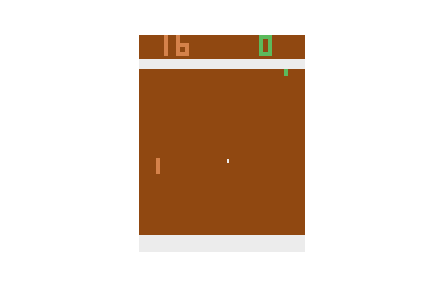
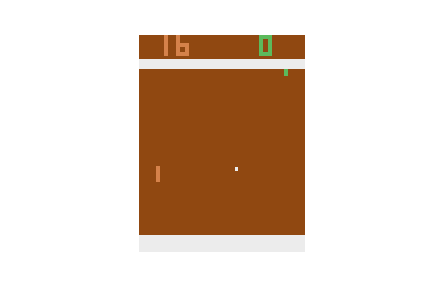
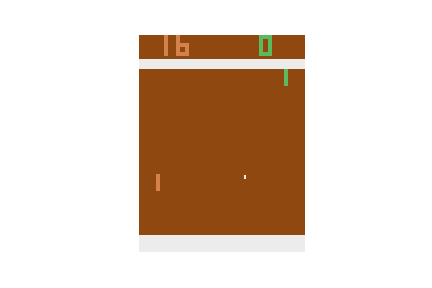
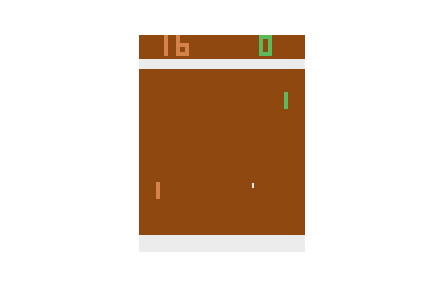
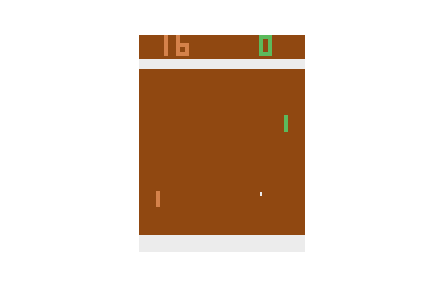
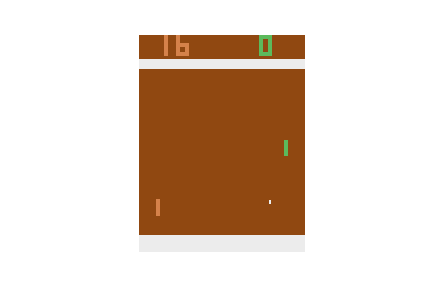
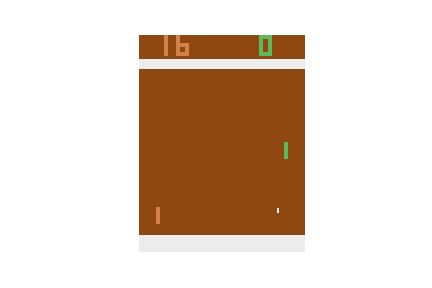
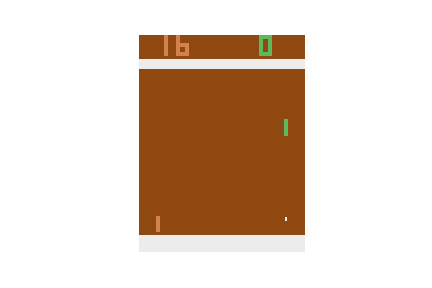
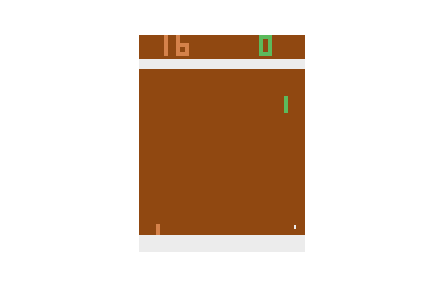
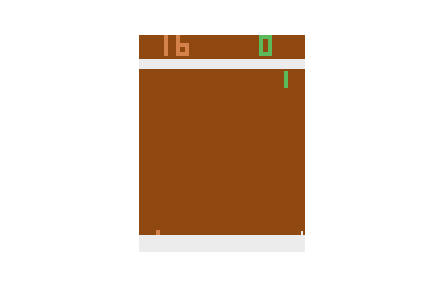
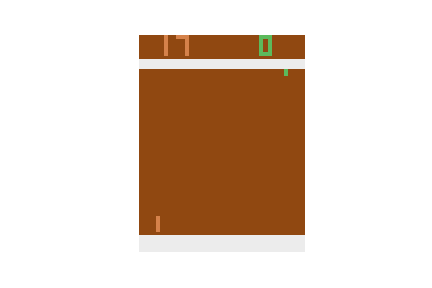
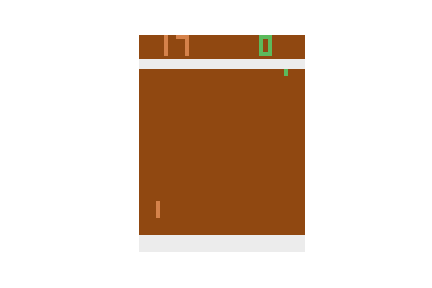
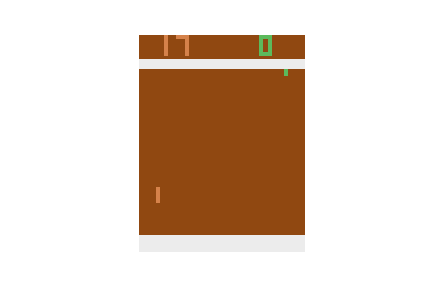
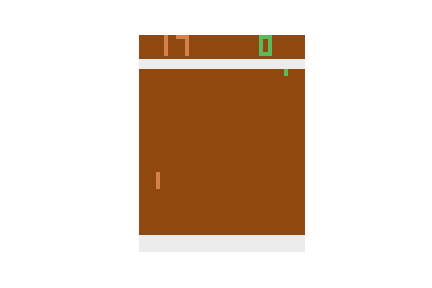
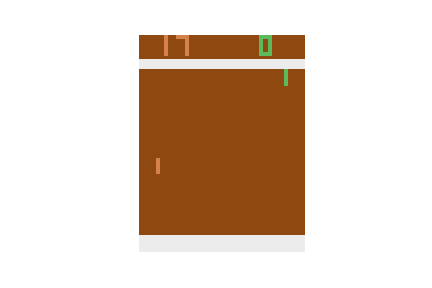
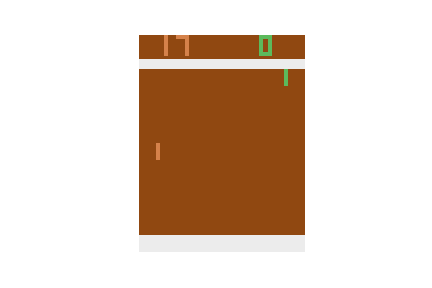
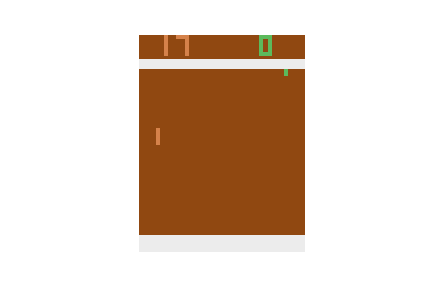
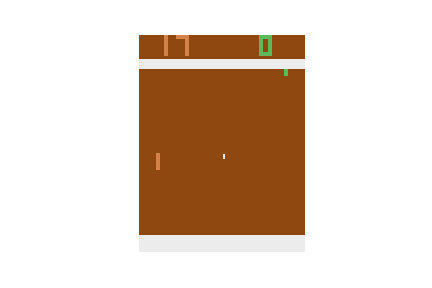
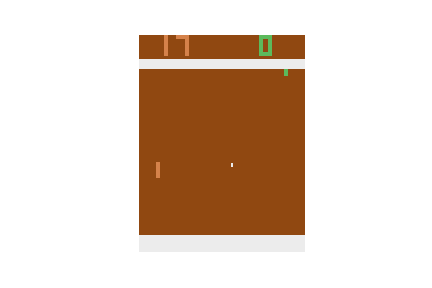
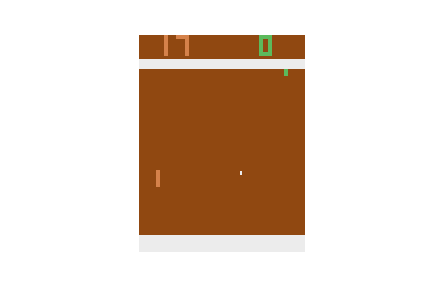
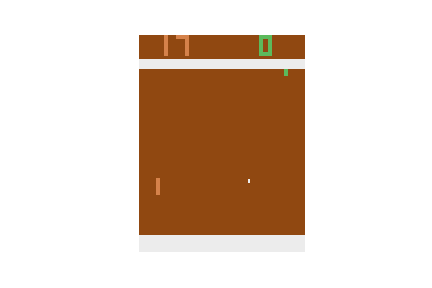
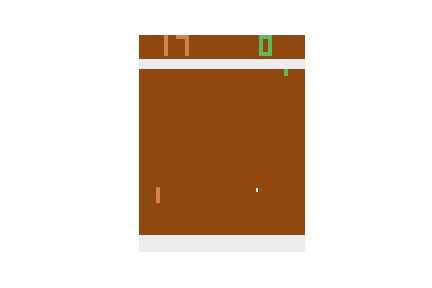
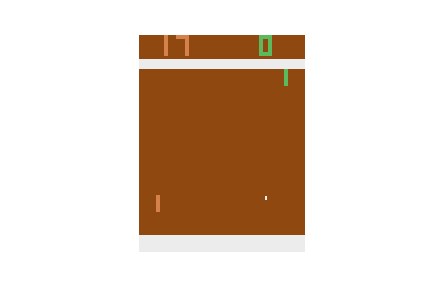
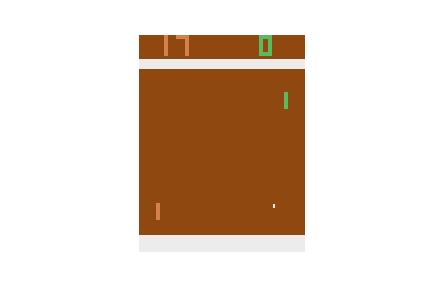
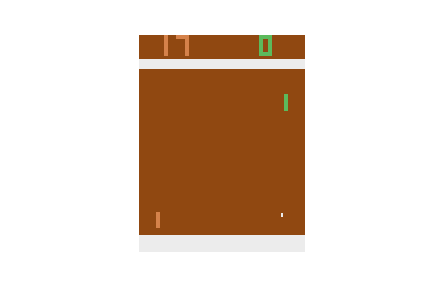
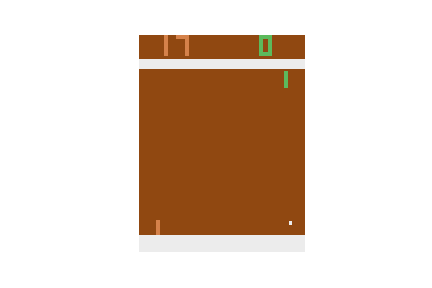
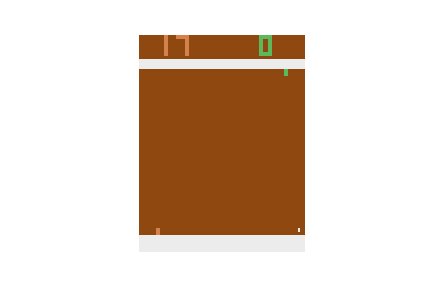
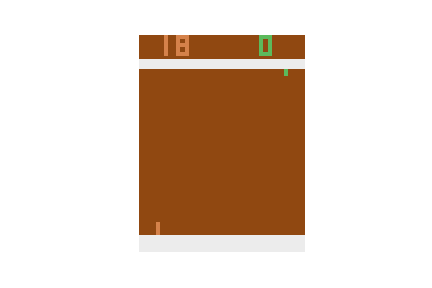
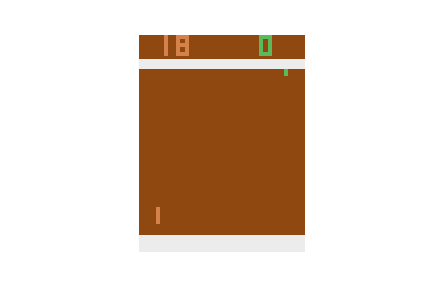
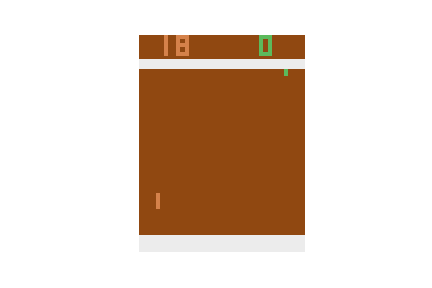
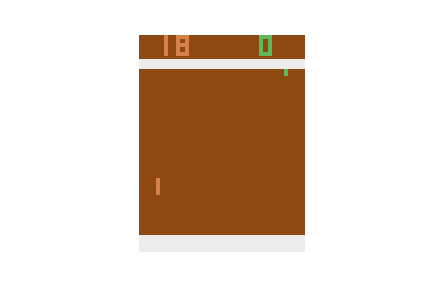
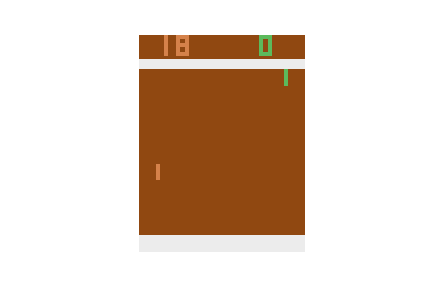
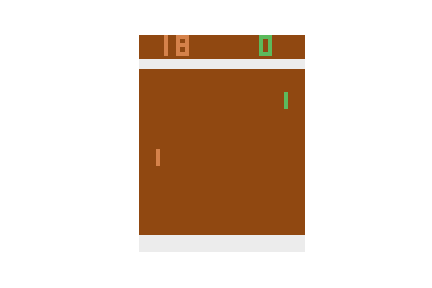
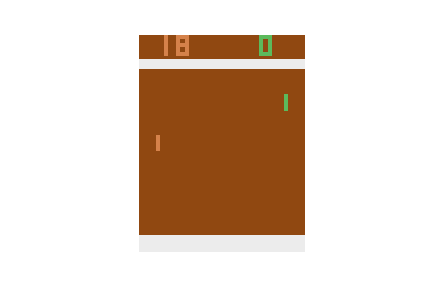
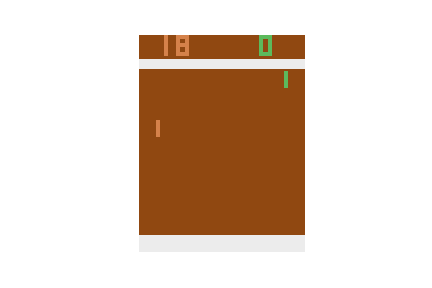
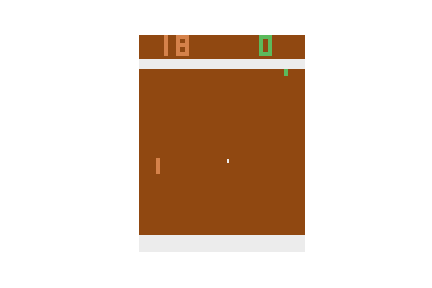
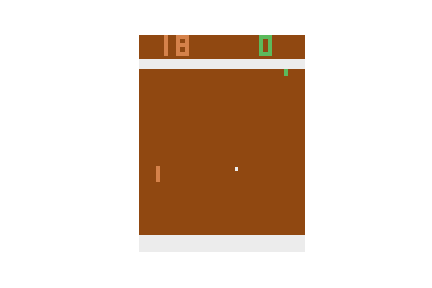
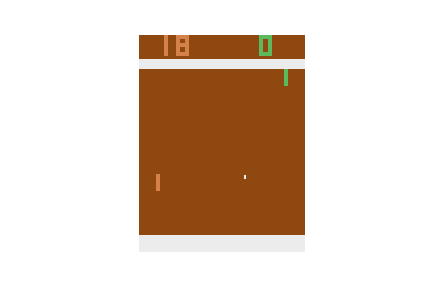
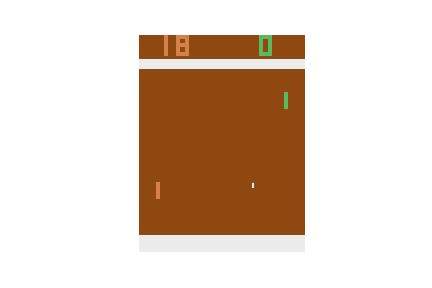
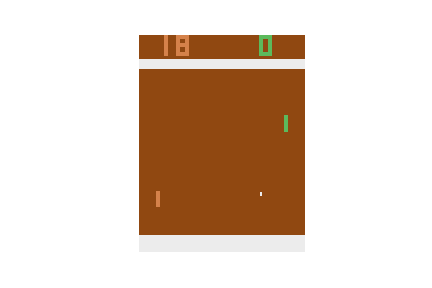
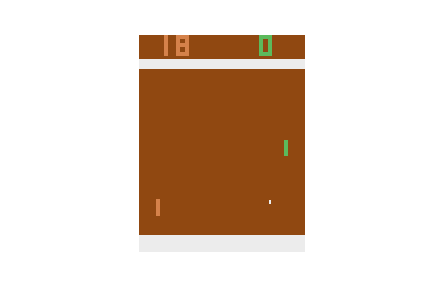
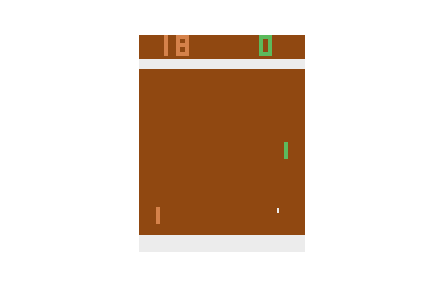
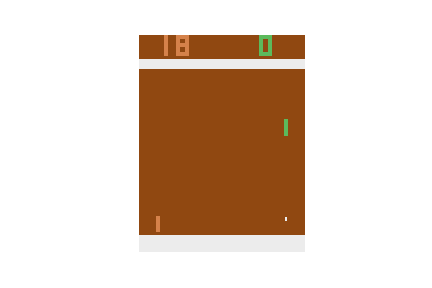
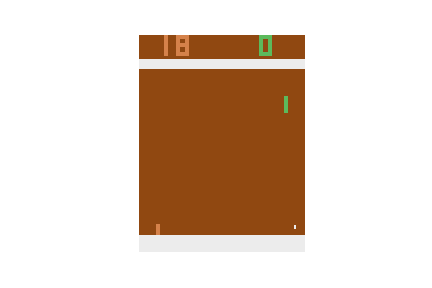
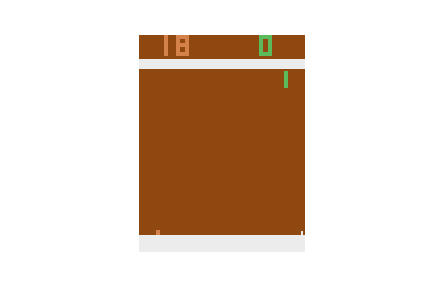
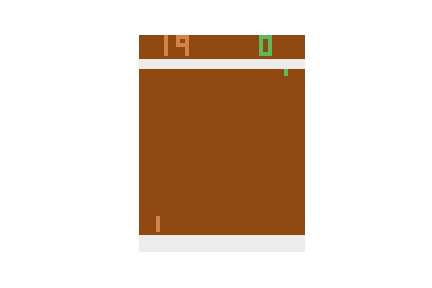
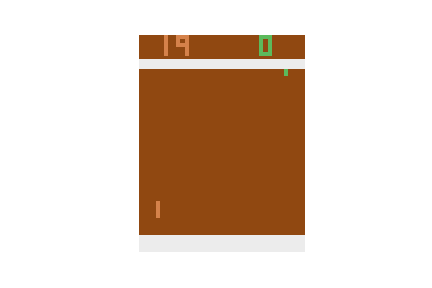
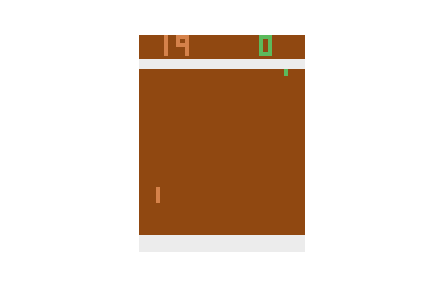
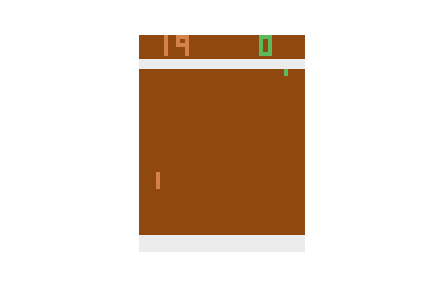
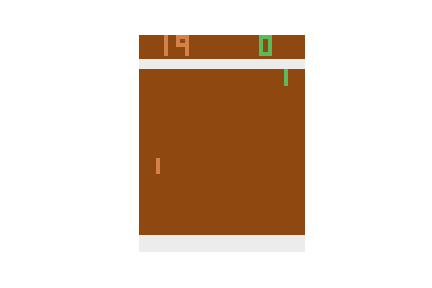
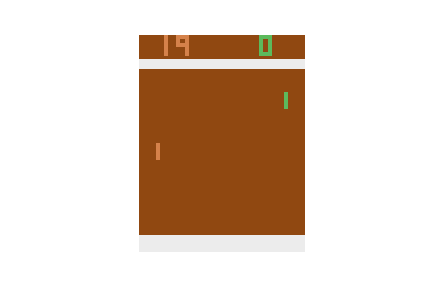
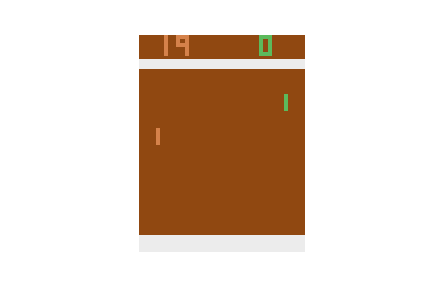
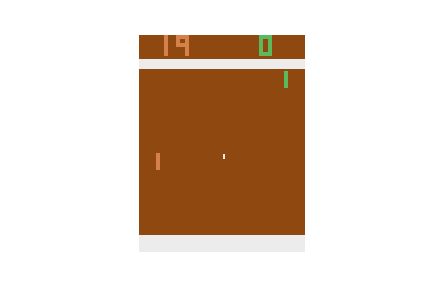
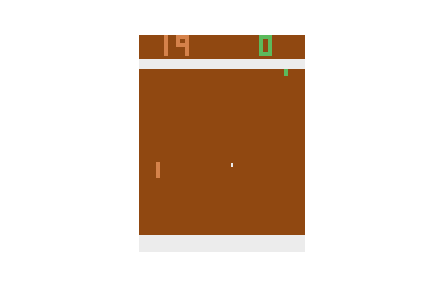
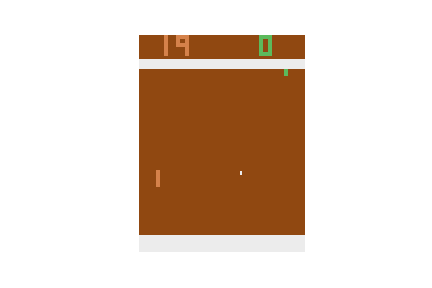
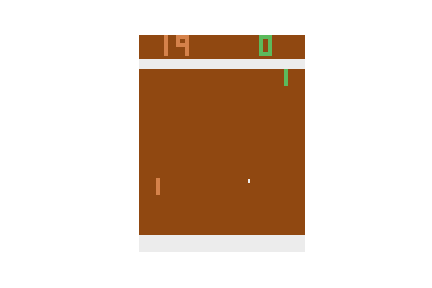
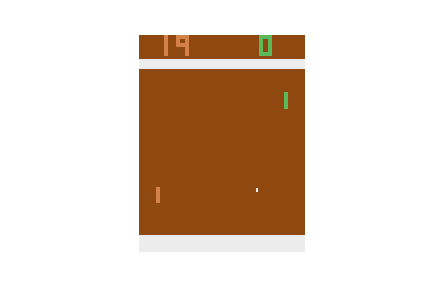
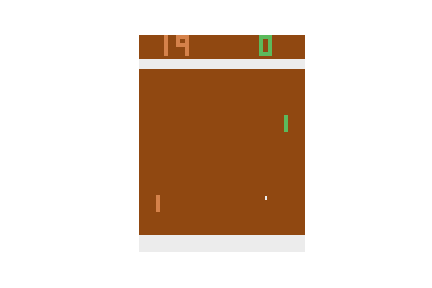
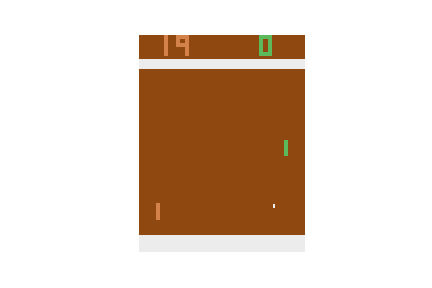
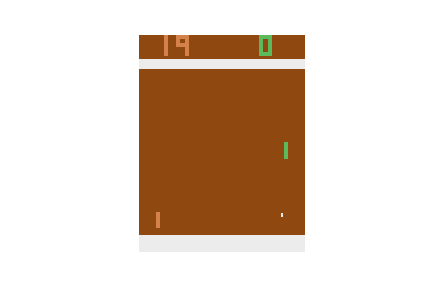
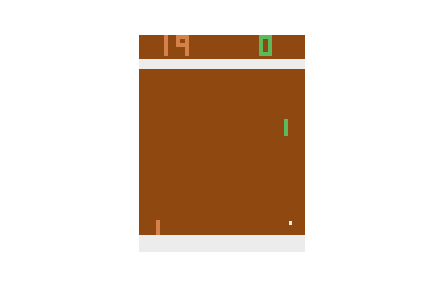
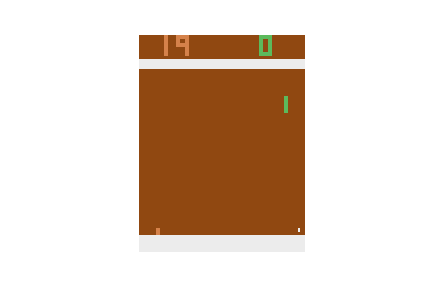
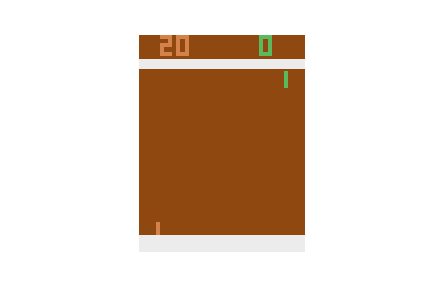
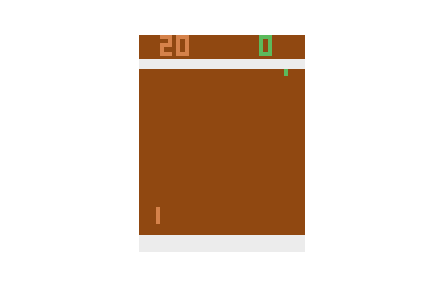
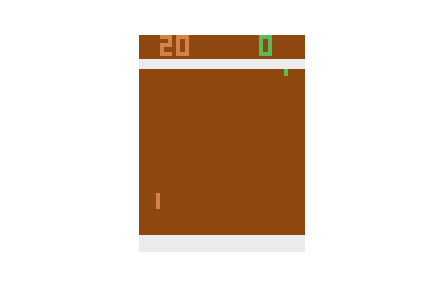
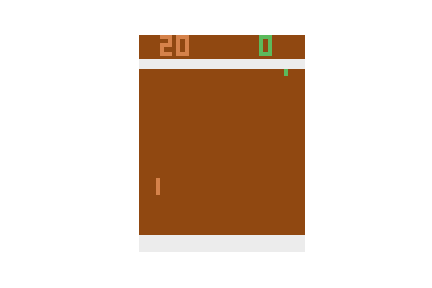
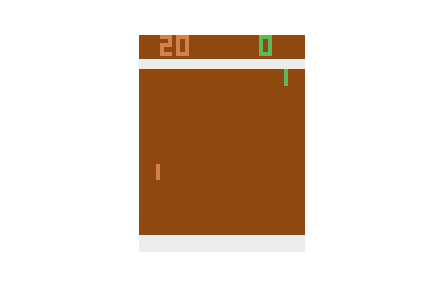
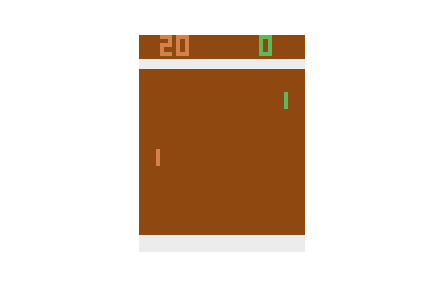
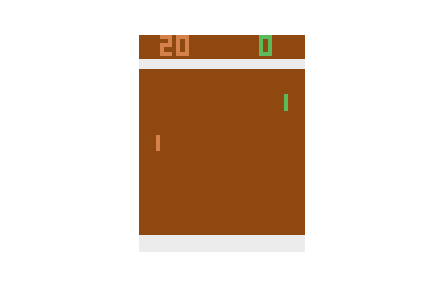
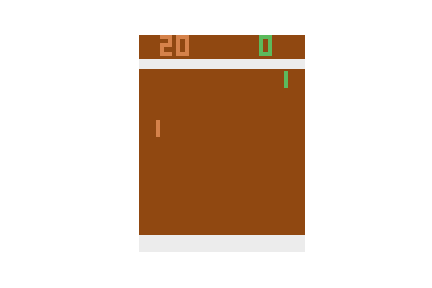
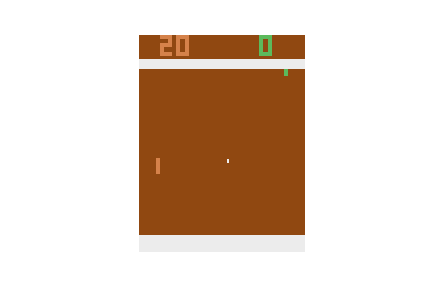
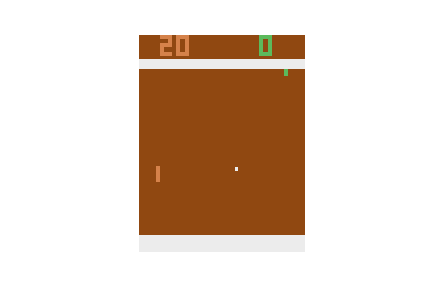
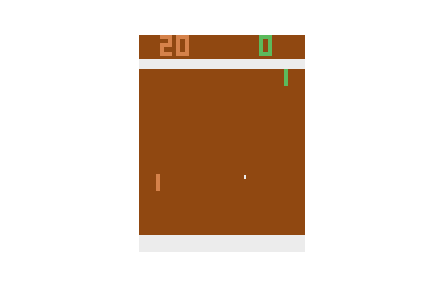
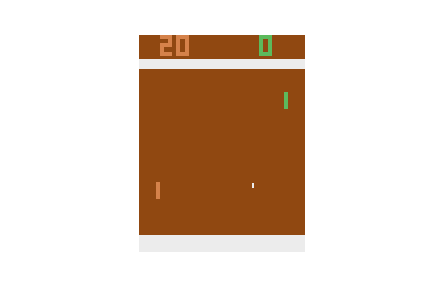
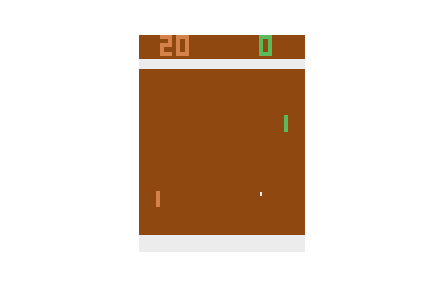
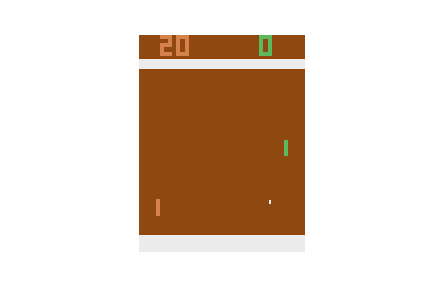
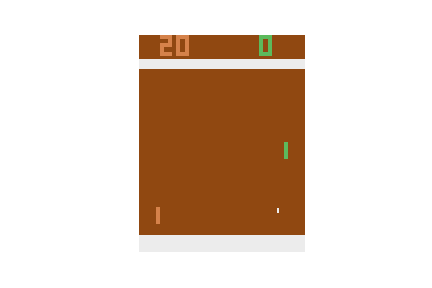
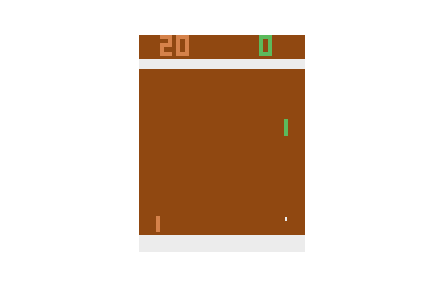
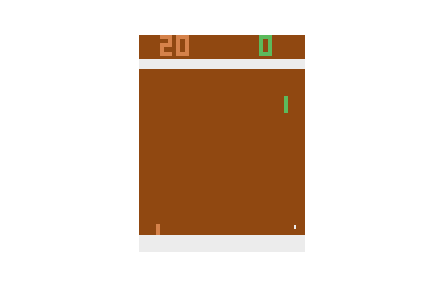
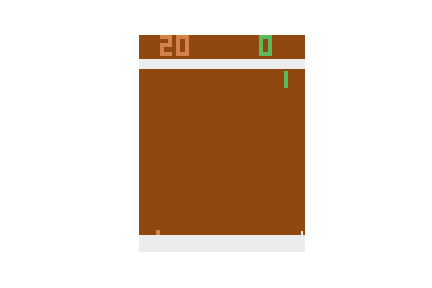

In [4]:
class Config:
    MODEL_NAME = 'model_4'
    CHECKPOINT_PATH = '/Users/sam/All-Program/App-DataSet/DeepRL/play_pong/%s/checkpoints/700.policy'%str(MODEL_NAME)
    STATS_JSON_PATH = '/Users/sam/All-Program/App-DataSet/DeepRL/play_pong/%s/checkpoints/stats.json'%str(MODEL_NAME)
    
    if not os.path.exists(CHECKPOINT_PATH):
        os.makedirs(CHECKPOINT_PATH)
        
Reinforce(Config, mode='test').test(num_timesteps=2000) 